# Data Descriptions
## tweetDf
Contains all of Elon Musks tweets and relavant information 

## btcDf
Contains all of the price data for Bitcoin from 2016 - November 2021 at the 1 hour interval for each day

## dogeDf
Contains all of the price data for Dogecoin from 2016 - November 2021 at the 1 hour interval for each day

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [2]:
tweetDf = pd.read_csv('../Data/tweets/elon_archive_cleaned.csv')
btcDf = pd.read_csv('../Data/crypto/bitcoinAll_1HR_cleaned.csv')
dogeDf = pd.read_csv('../Data/crypto/dogecoinAll_1HR_cleaned.csv')


# Drop any prices greater than the ATH of both doge and BTC

In [3]:
BTC_ATH = 69045
btcDf.drop(btcDf[btcDf['rate_open'] > BTC_ATH].index, inplace = True)
btcDf.drop(btcDf[btcDf['rate_close'] > BTC_ATH].index, inplace = True)
btcDf.drop(btcDf[btcDf['rate_high'] > BTC_ATH].index, inplace = True)
btcDf.drop(btcDf[btcDf['rate_low'] > BTC_ATH].index, inplace = True)
btcDf = btcDf.drop("Unnamed: 0",axis=1)

In [4]:
DOGE_ATH = 0.7376
dogeDf.drop(dogeDf[dogeDf['rate_open'] > DOGE_ATH].index, inplace = True)
dogeDf.drop(dogeDf[dogeDf['rate_close'] > DOGE_ATH].index, inplace = True)
dogeDf.drop(dogeDf[dogeDf['rate_high'] > DOGE_ATH].index, inplace = True)
dogeDf.drop(dogeDf[dogeDf['rate_low'] > DOGE_ATH].index, inplace = True)
dogeDf = dogeDf.drop("Unnamed: 0",axis=1)

# Bitcoin graphs and visualizations

In [5]:
colors = ['indianred','goldenrod','lightseagreen','green','royalblue','indigo','violet','cyan','chocolate','lightblue','pink','tan']
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Years = [2016,2017,2018,2019,2020,2021]
days = []

for i in range (1,32):
    days.append(i)

In [6]:
plt.figure(figsize=(20,10))
btc2016 = btcDf[btcDf['year'] == 2016]
btc2017 = btcDf[btcDf['year'] == 2017]
btc2018 = btcDf[btcDf['year'] == 2018]
btc2019 = btcDf[btcDf['year'] == 2019]
btc2020 = btcDf[btcDf['year'] == 2020]
btc2021 = btcDf[btcDf['year'] == 2021]
plt.plot(btc2016['rate_high'])
plt.plot(btc2017['rate_high'])
plt.plot(btc2018['rate_high'])
plt.plot(btc2019['rate_high'])
plt.plot(btc2020['rate_high'])
plt.plot(btc2021['rate_high'])
plt.tick_params(labelbottom=False)
plt.legend([2016,2017,2018,2019,2020,2021],prop={'size': 30})
plt.ylabel("PRICE",fontsize = 15)
plt.title("Bitcoin price from 2016 - 2021",fontsize = 15)
plt.show()

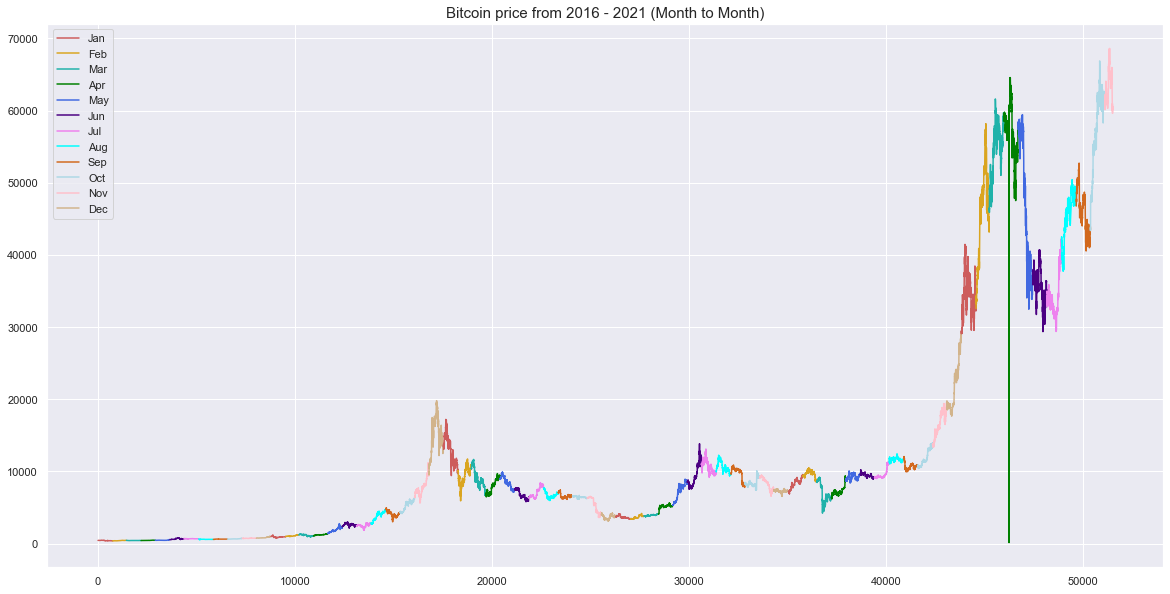

In [7]:
plt.figure(figsize=(20,10))
for i in range(2016,2022):
    for j in range(1,13):
        x = btcDf[(btcDf['year'] == i) & (btcDf['month'] == j) ]
        plt.plot(x['rate_close'],color=colors[j-1])
plt.title("Bitcoin price from 2016 - 2021 (Month to Month)",fontsize = 15)
plt.legend(Months)    
plt.show()

### Bitcoin historical month comparisons

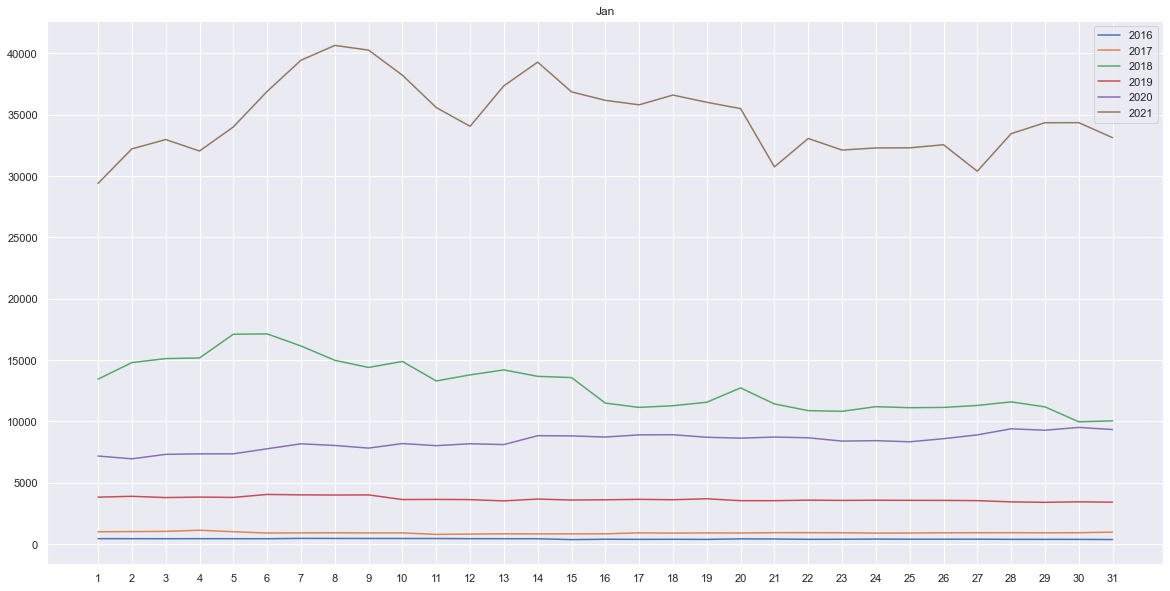

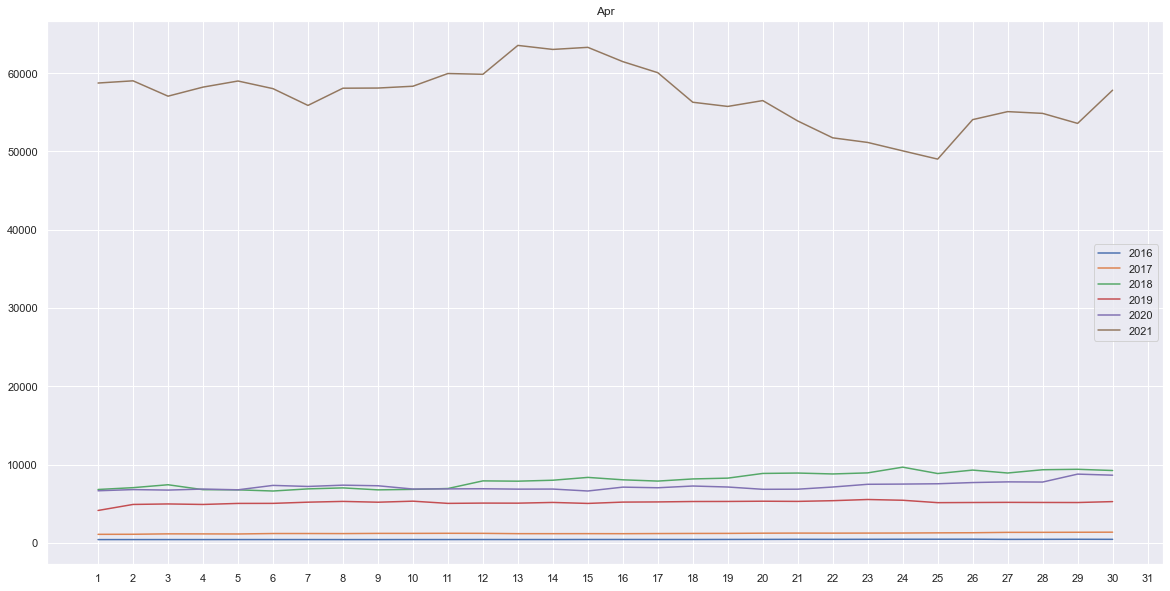

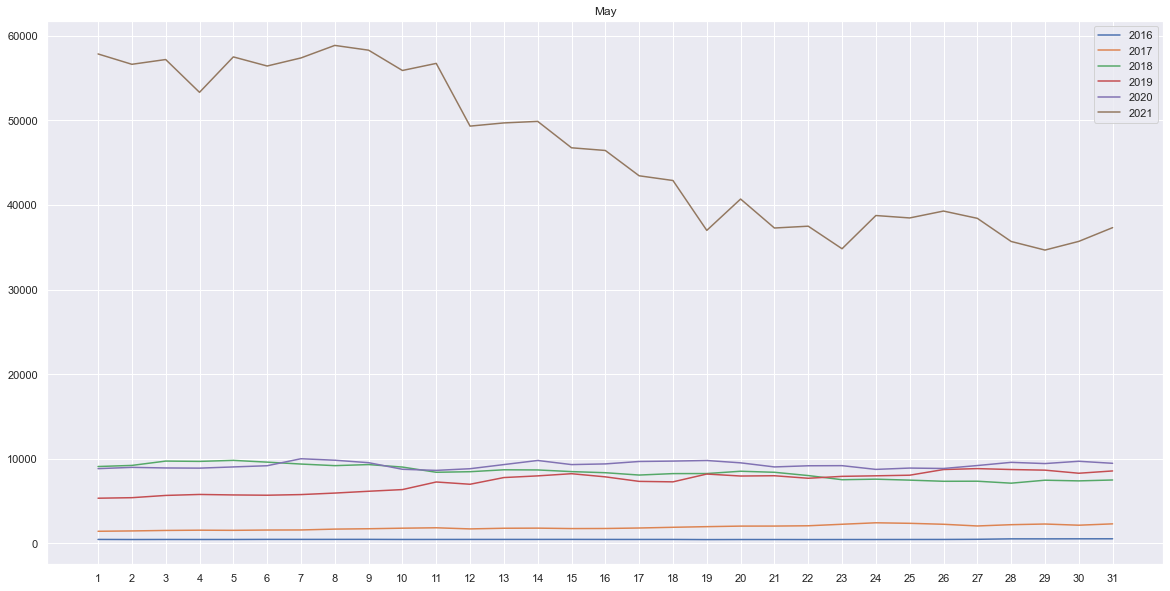

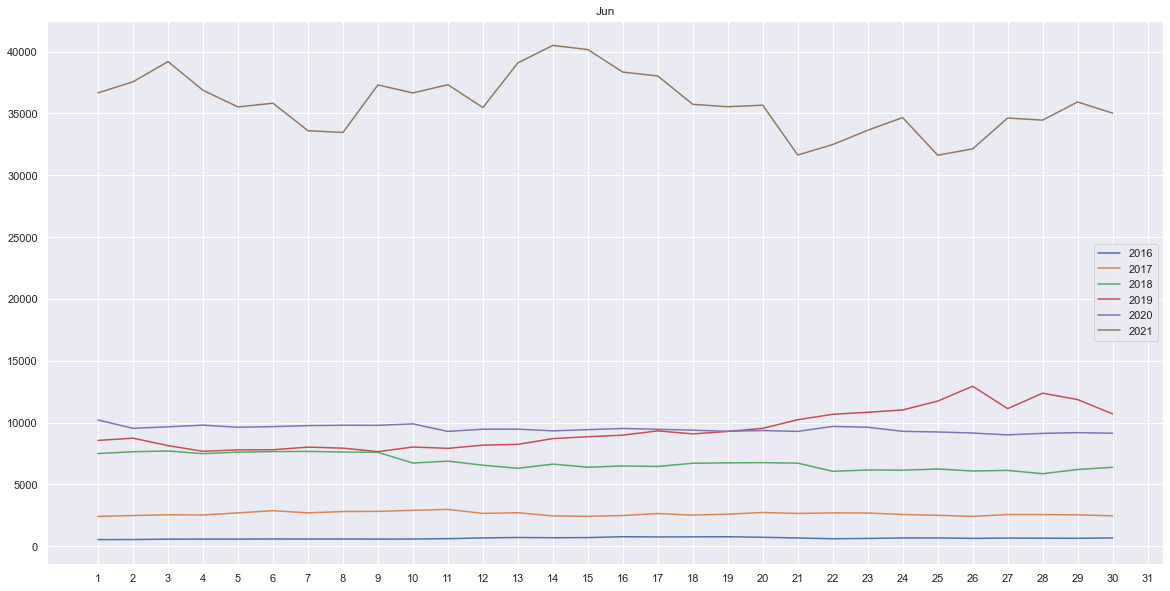

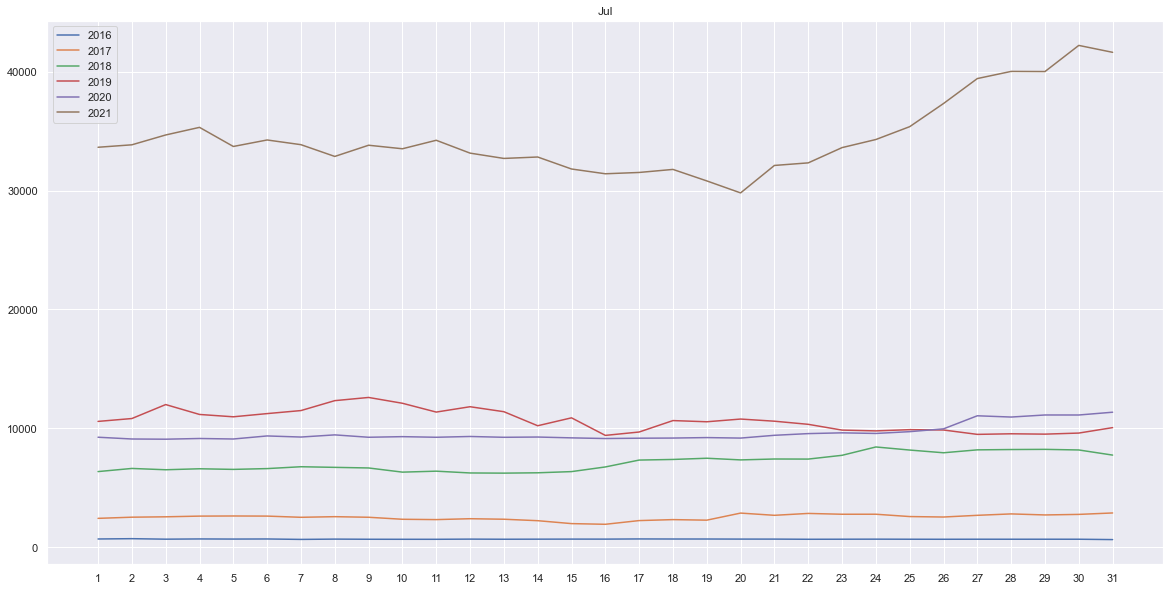

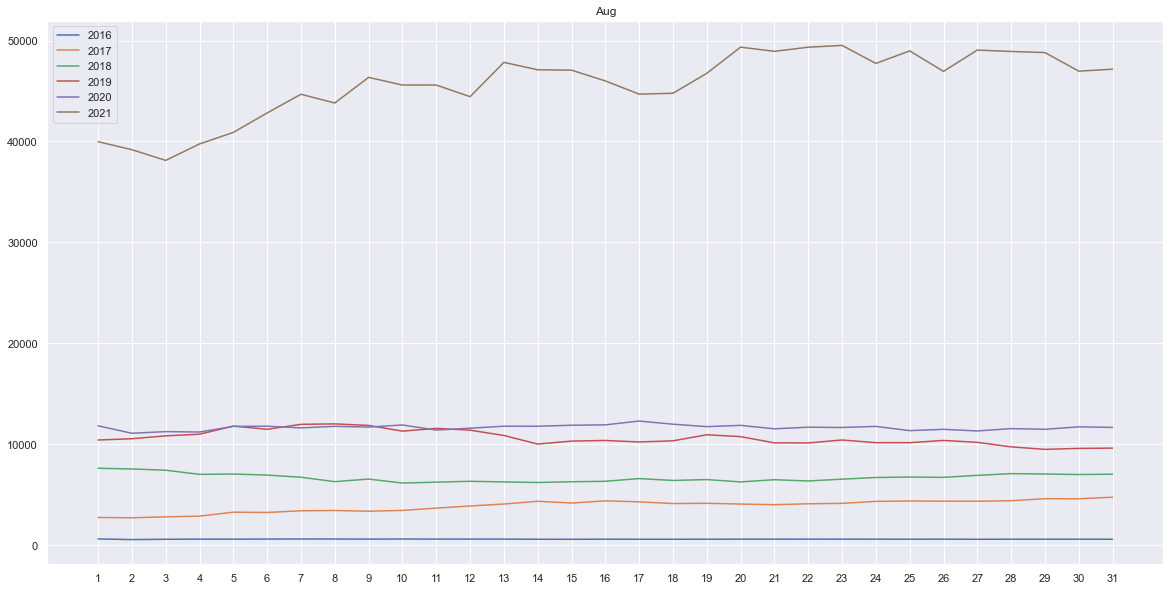

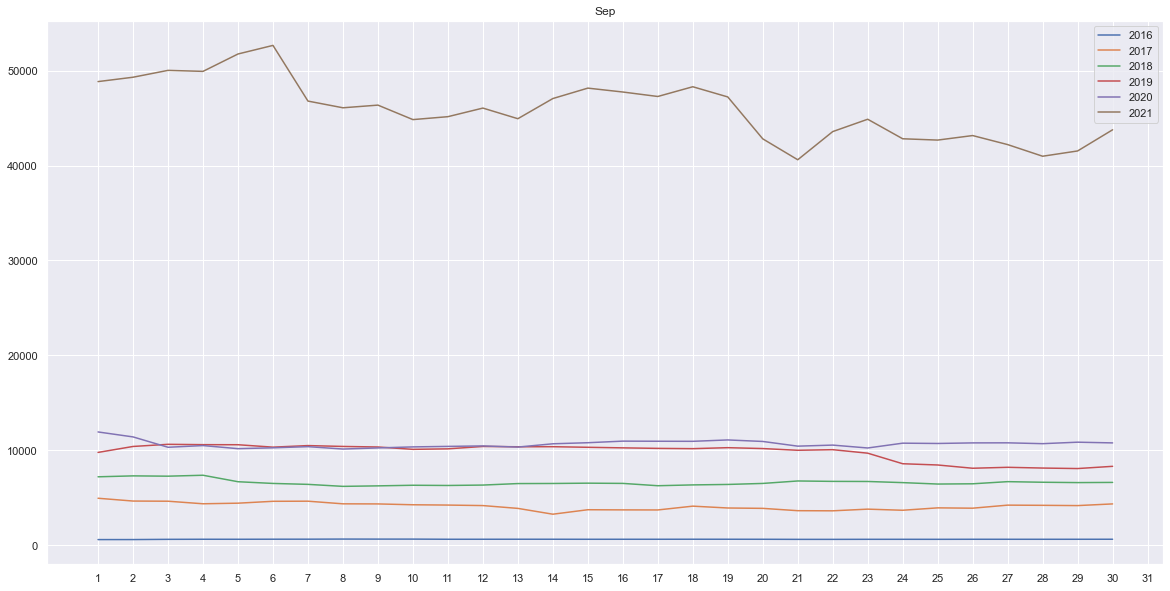

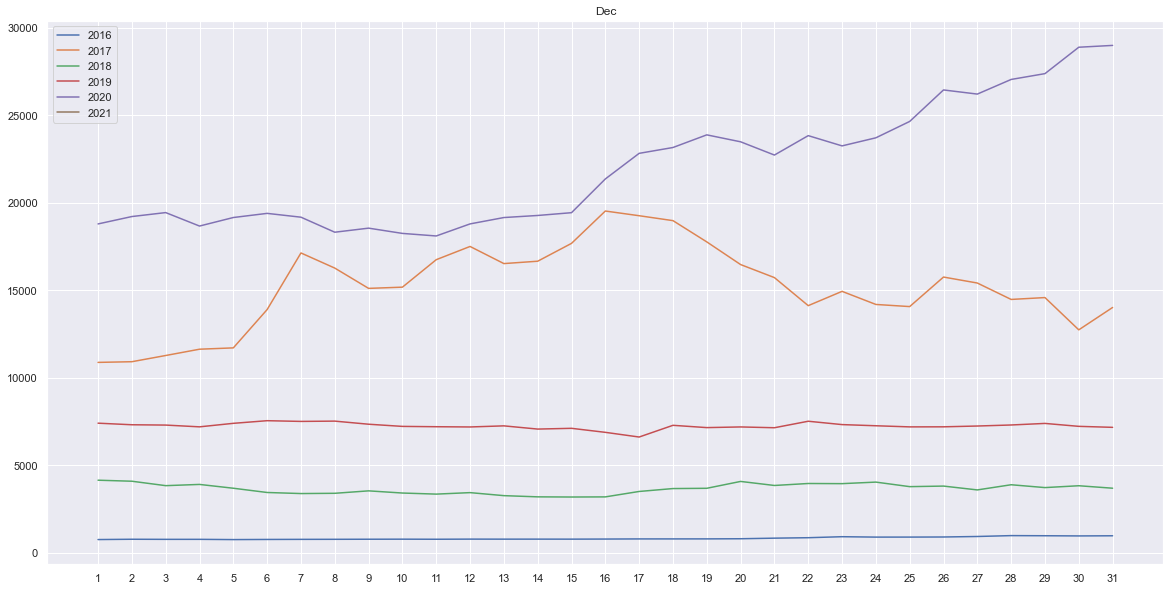

In [8]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = btcDf[(btcDf['hour'] == 23) & (btcDf['year'] == j) & (btcDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

# Dogecoin graphs and visualizations

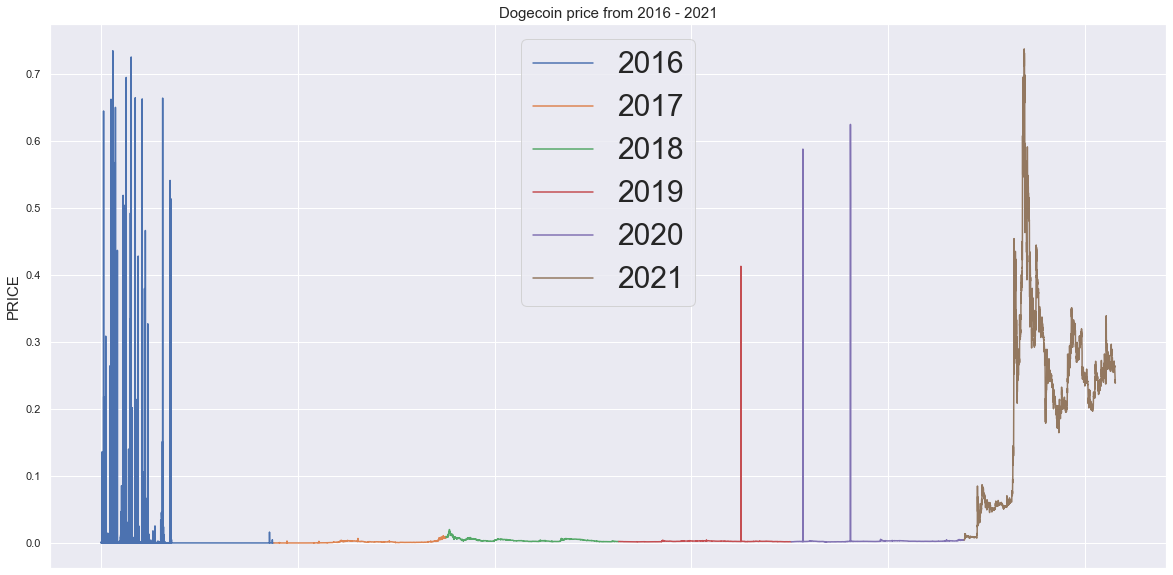

In [9]:
plt.figure(figsize=(20,10))
doge2016 = dogeDf[dogeDf['year'] == 2016]
doge2017 = dogeDf[dogeDf['year'] == 2017]
doge2018 = dogeDf[dogeDf['year'] == 2018]
doge2019 = dogeDf[dogeDf['year'] == 2019]
doge2020 = dogeDf[dogeDf['year'] == 2020]
doge2021 = dogeDf[dogeDf['year'] == 2021]
plt.plot(doge2016['rate_high'])
plt.plot(doge2017['rate_high'])
plt.plot(doge2018['rate_high'])
plt.plot(doge2019['rate_high'])
plt.plot(doge2020['rate_high'])
plt.plot(doge2021['rate_high'])
plt.tick_params(labelbottom=False)
plt.legend([2016,2017,2018,2019,2020,2021],prop={'size': 30})
plt.ylabel("PRICE",fontsize = 15)
plt.title("Dogecoin price from 2016 - 2021",fontsize = 15)
plt.show()

In [10]:
plt.figure(figsize=(20,10))
for i in range(2016,2022):
    for j in range(1,13):
        x = dogeDf[(dogeDf['year'] == i) & (dogeDf['month'] == j) ]
        plt.plot(x['rate_close'],color=colors[j-1])

plt.legend(Months)    
plt.show()

### Dogecoin historical month comparisons

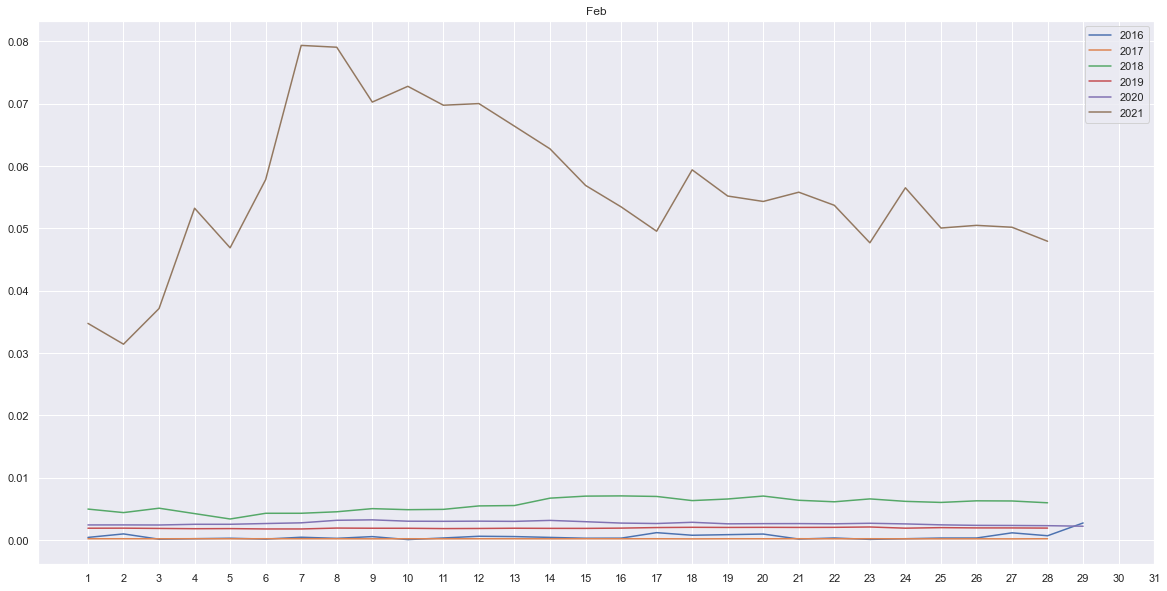

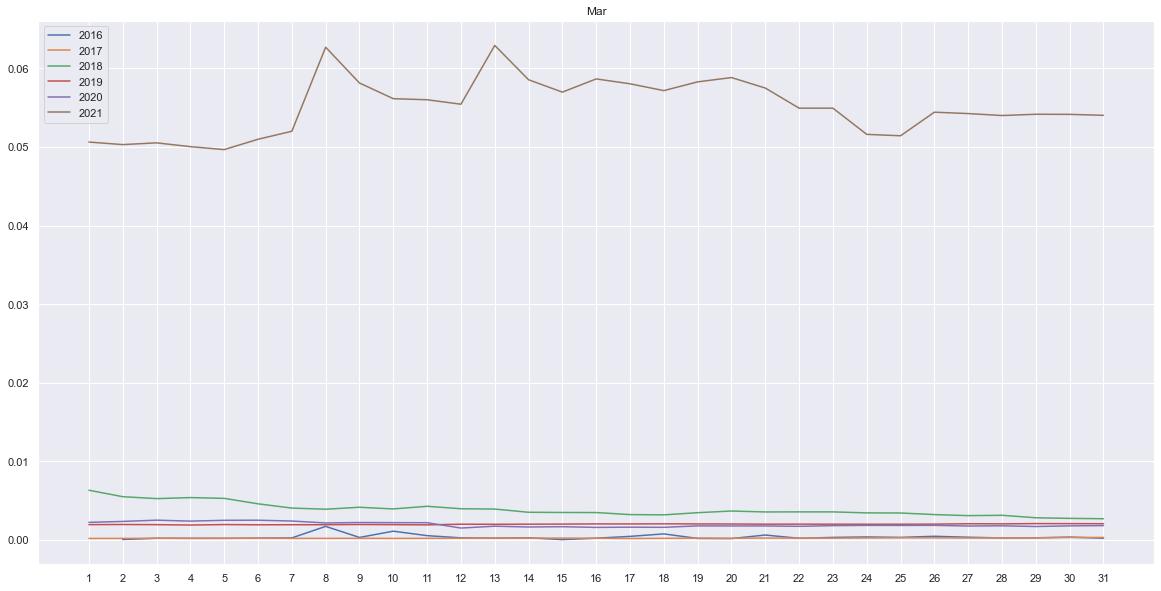

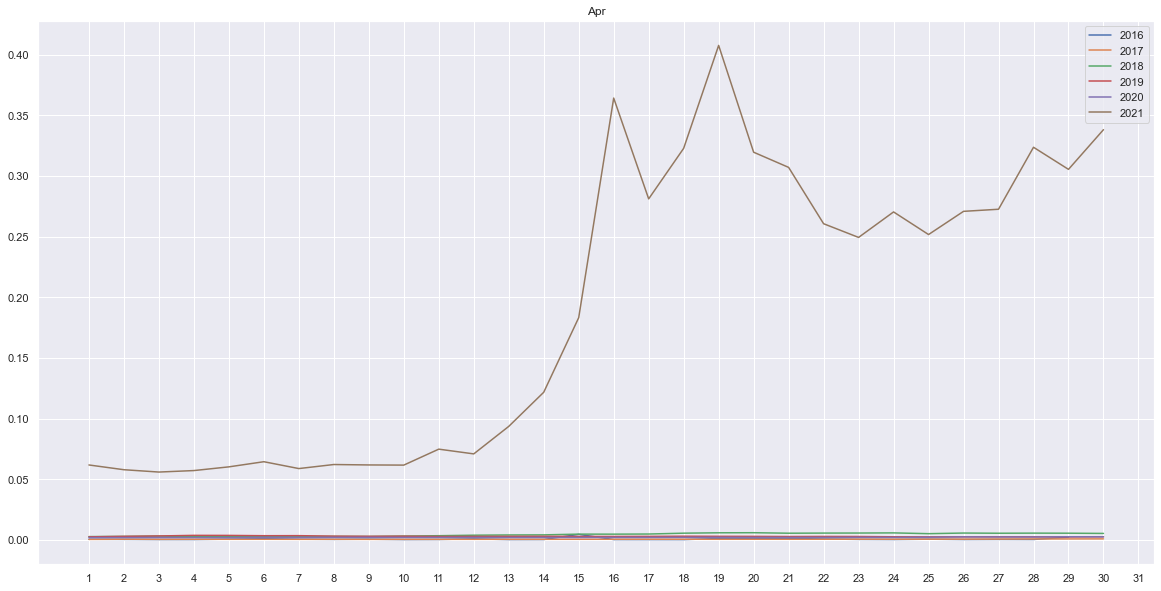

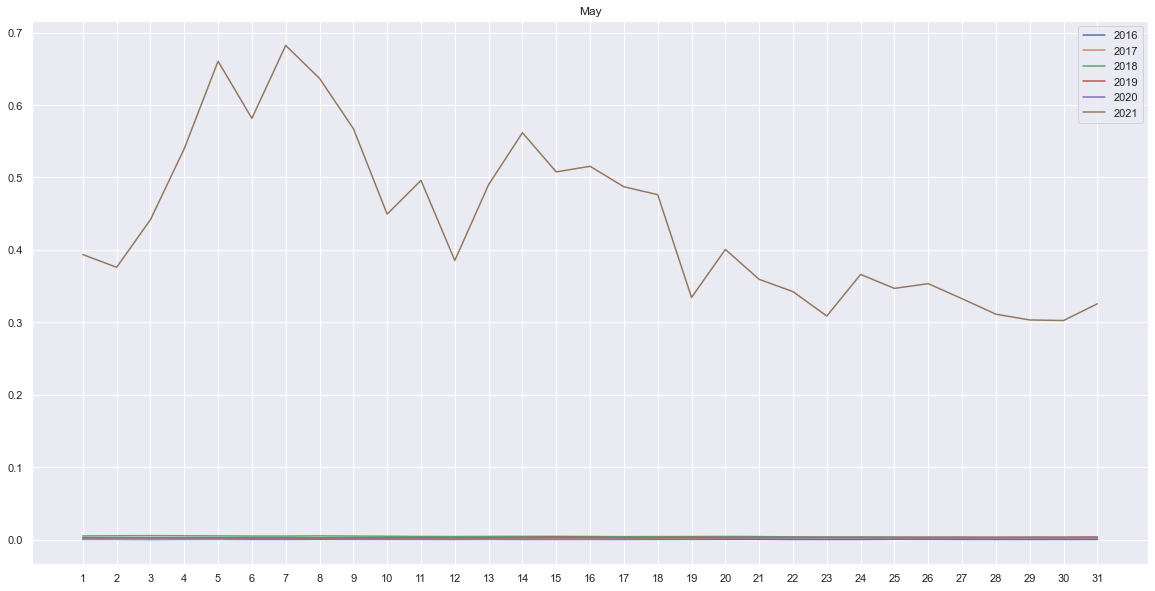

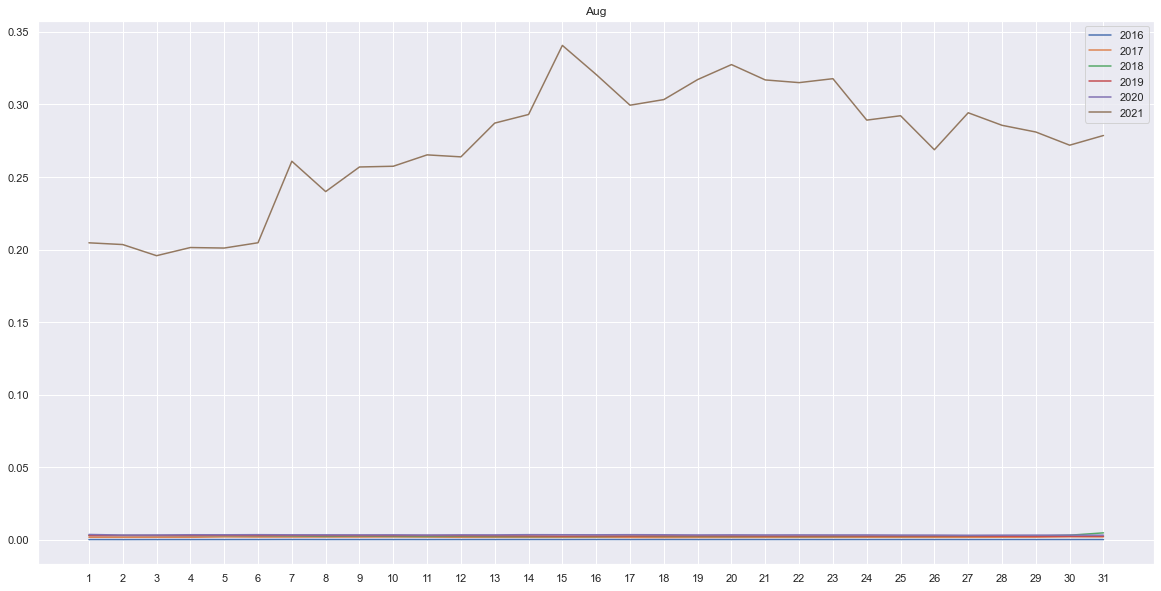

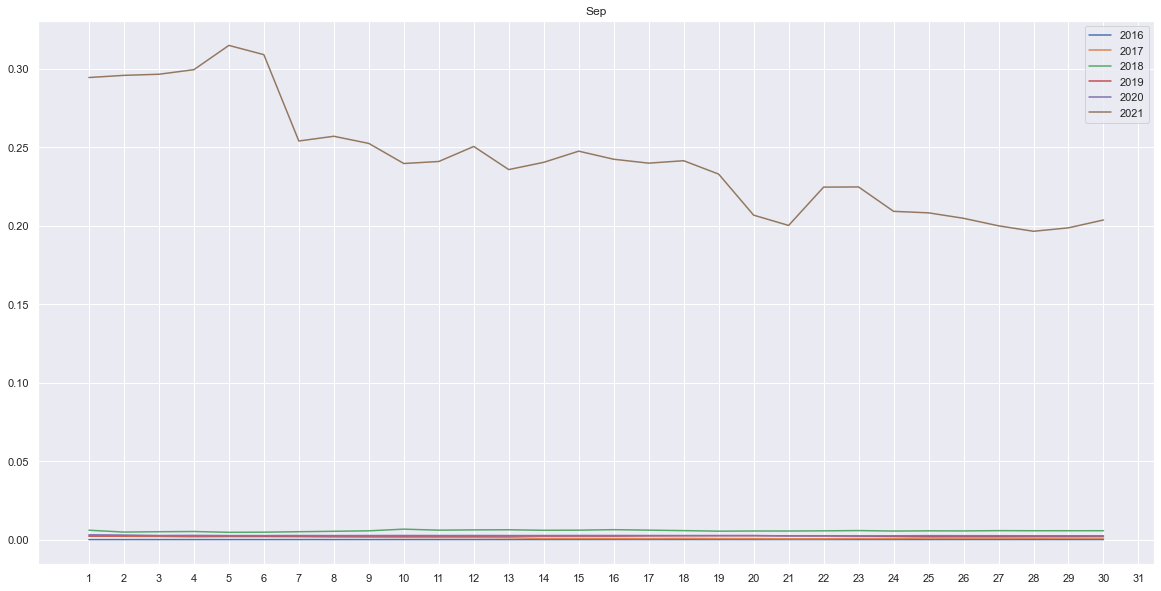

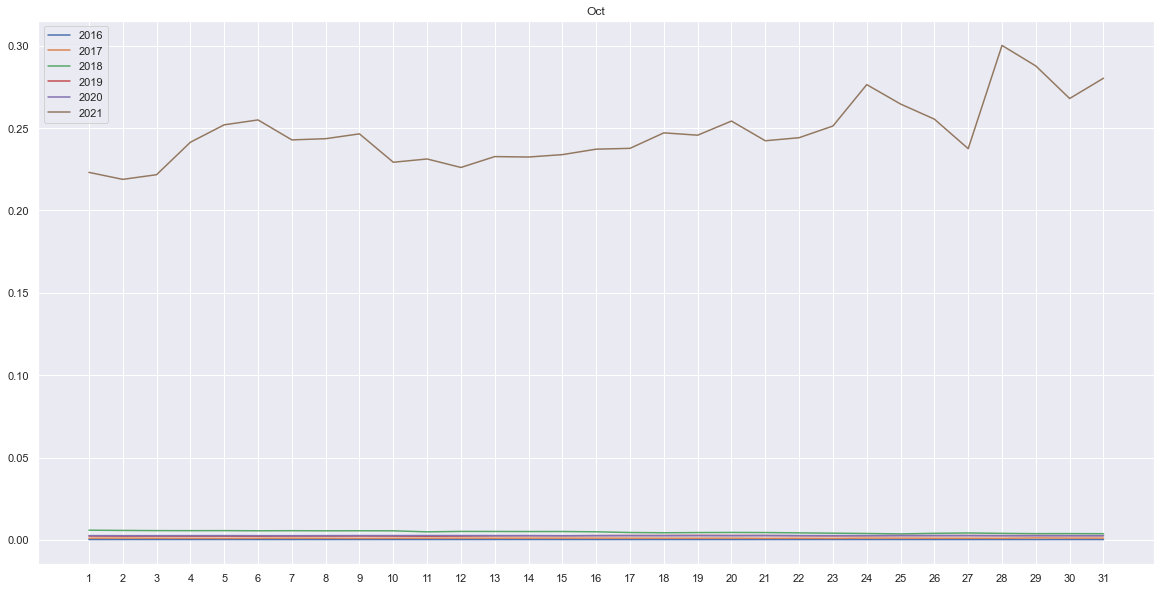

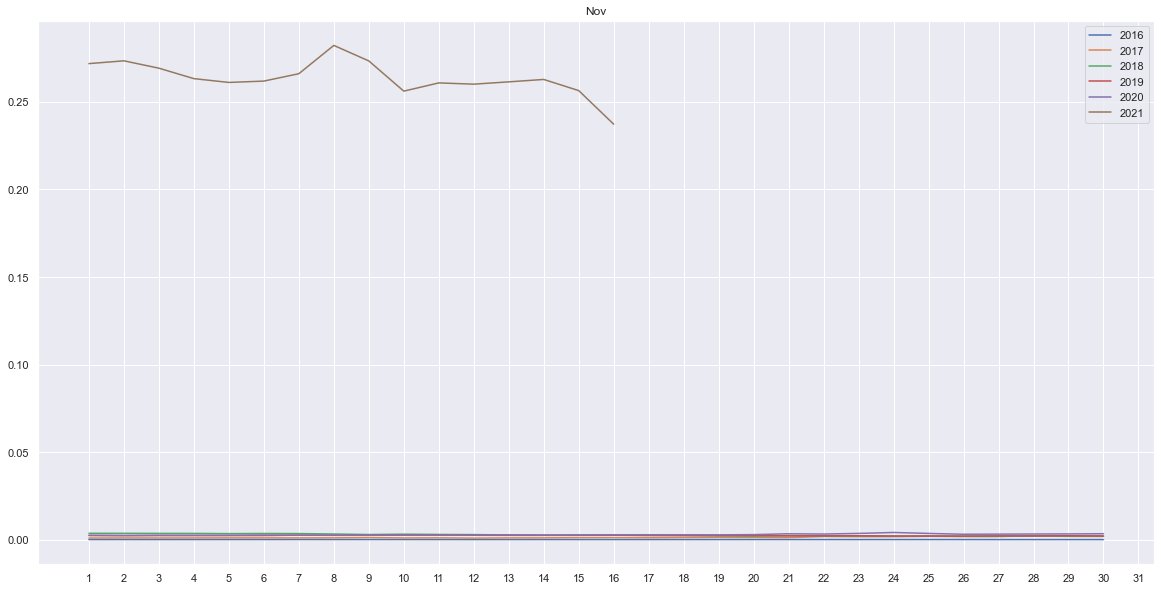

In [11]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = dogeDf[(dogeDf['hour'] == 23) & (dogeDf['year'] == j) & (dogeDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

# Tweet Analysis

## Tweets corresponding to crypto mapped onto BTC historical month visualization

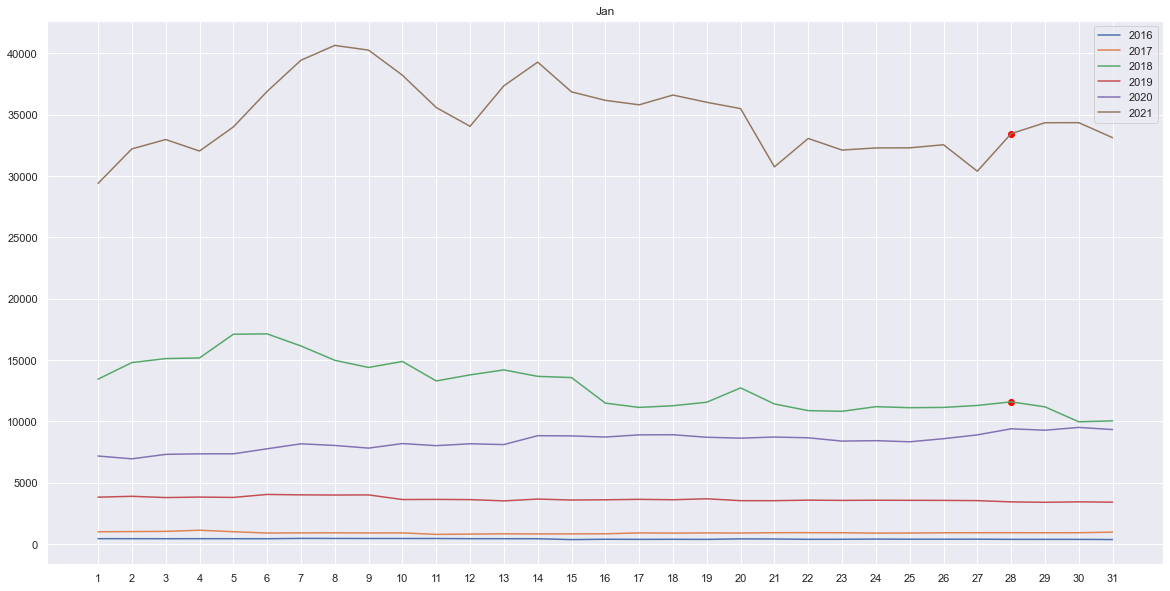

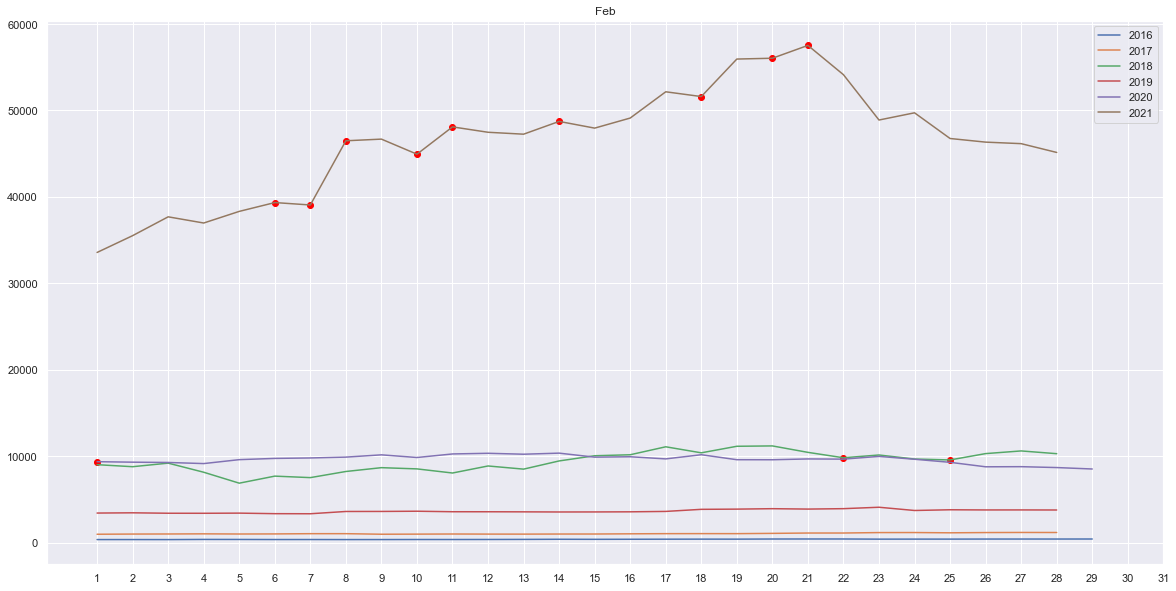

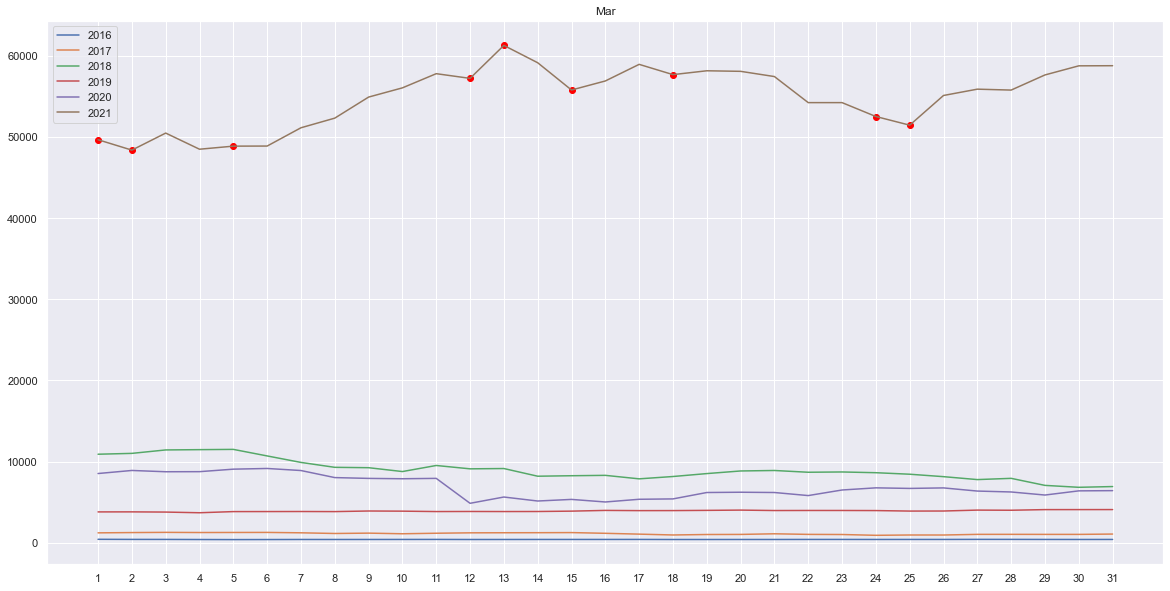

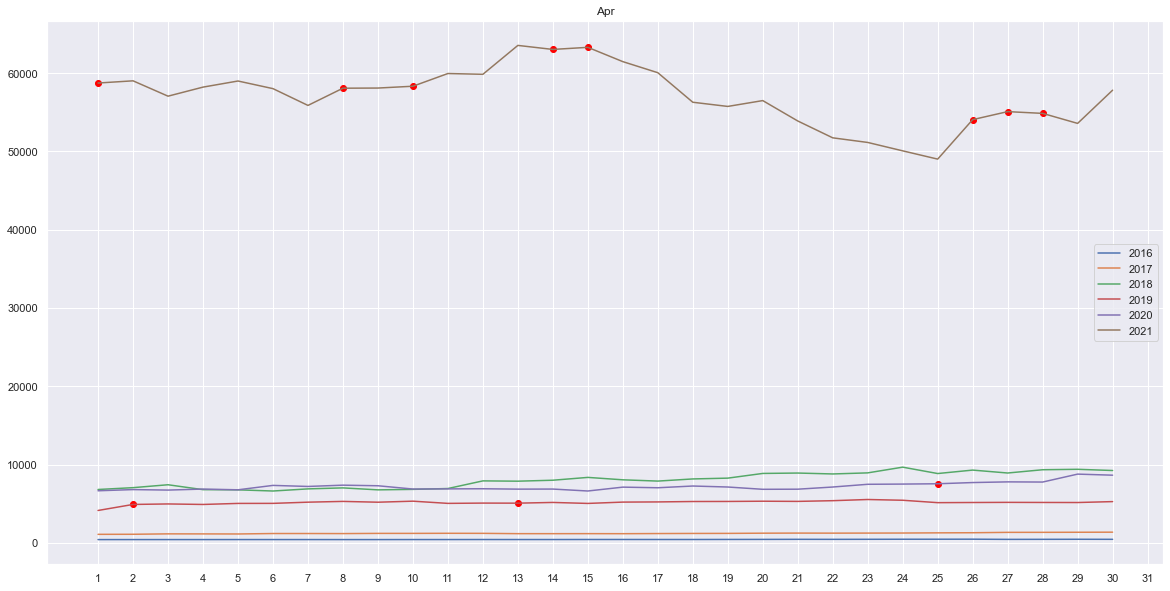

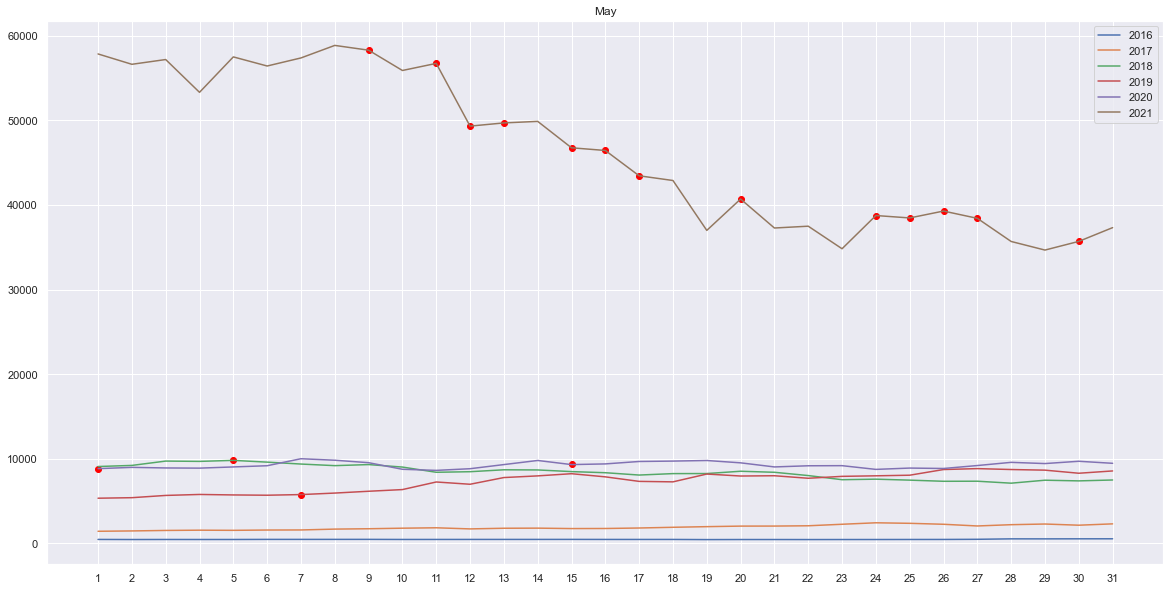

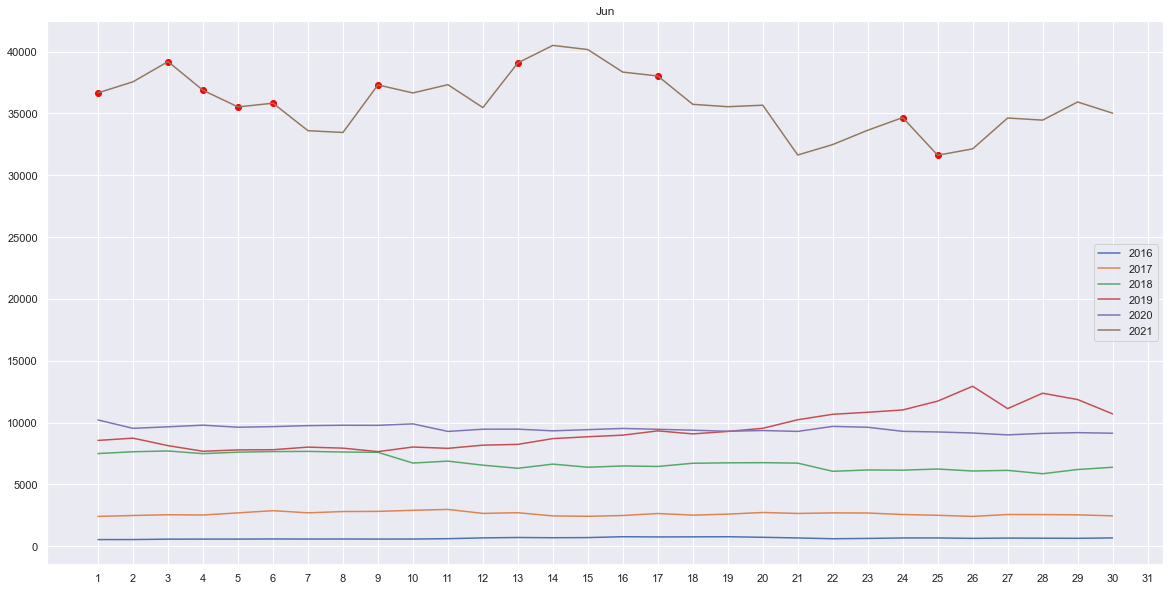

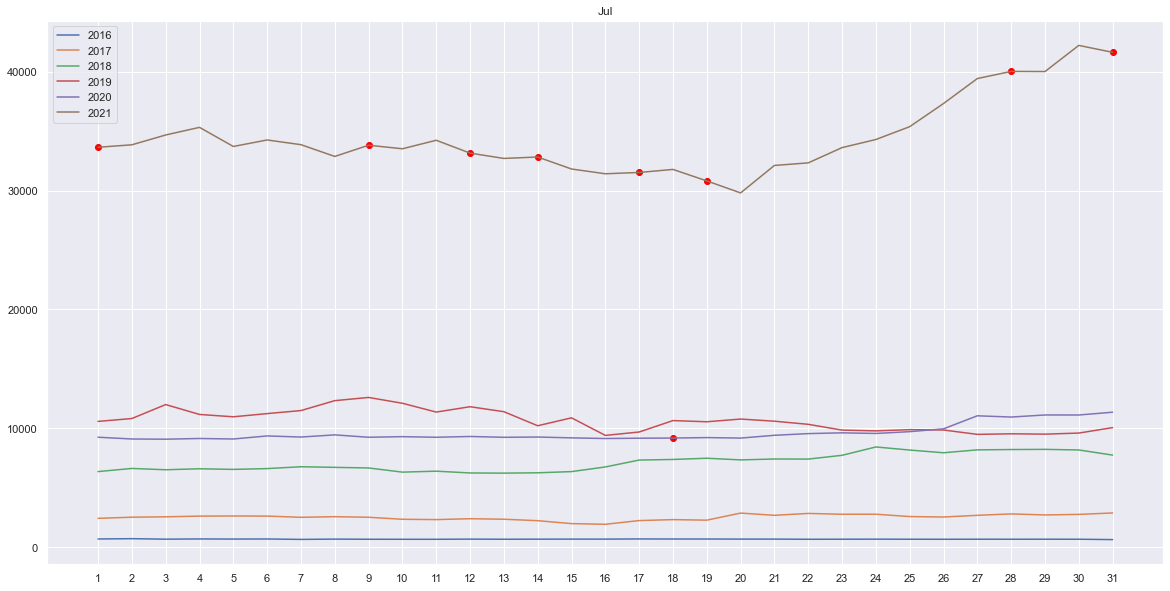

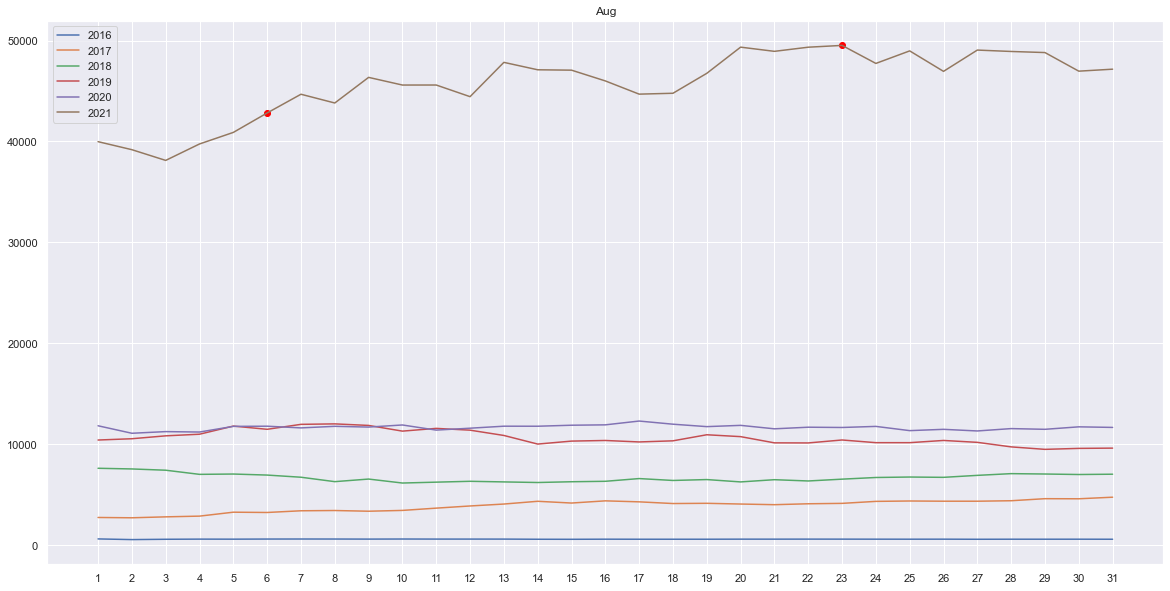

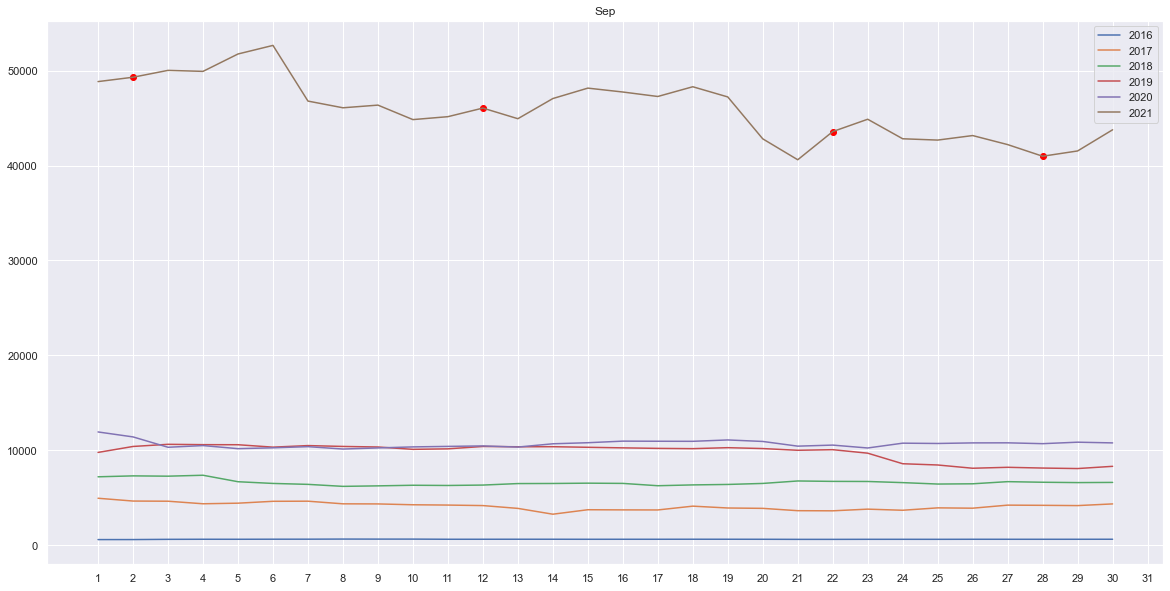

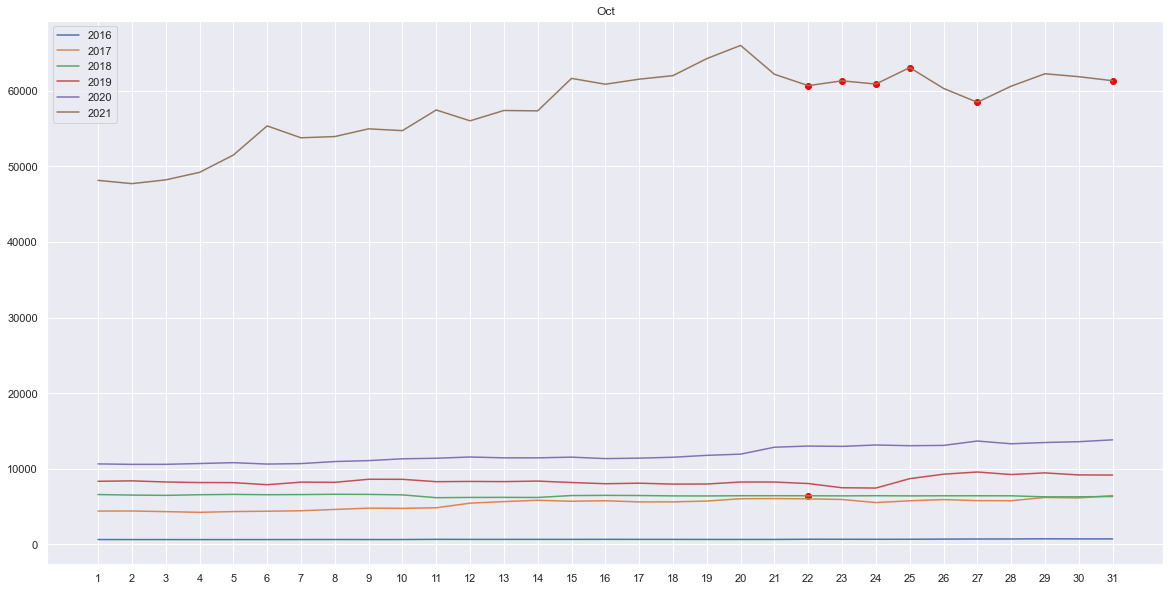

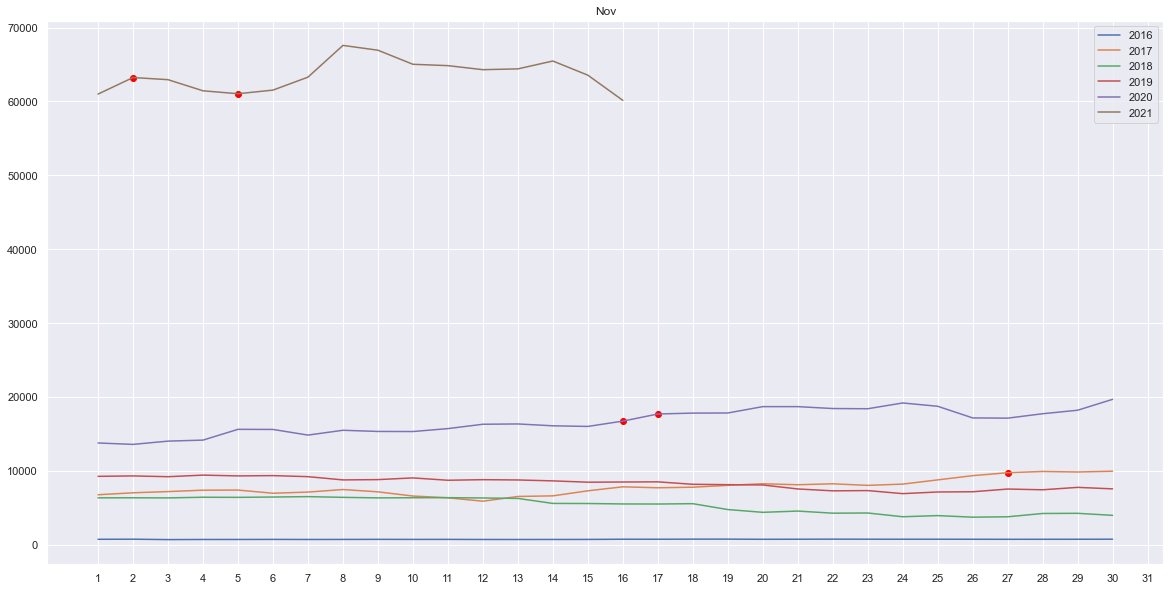

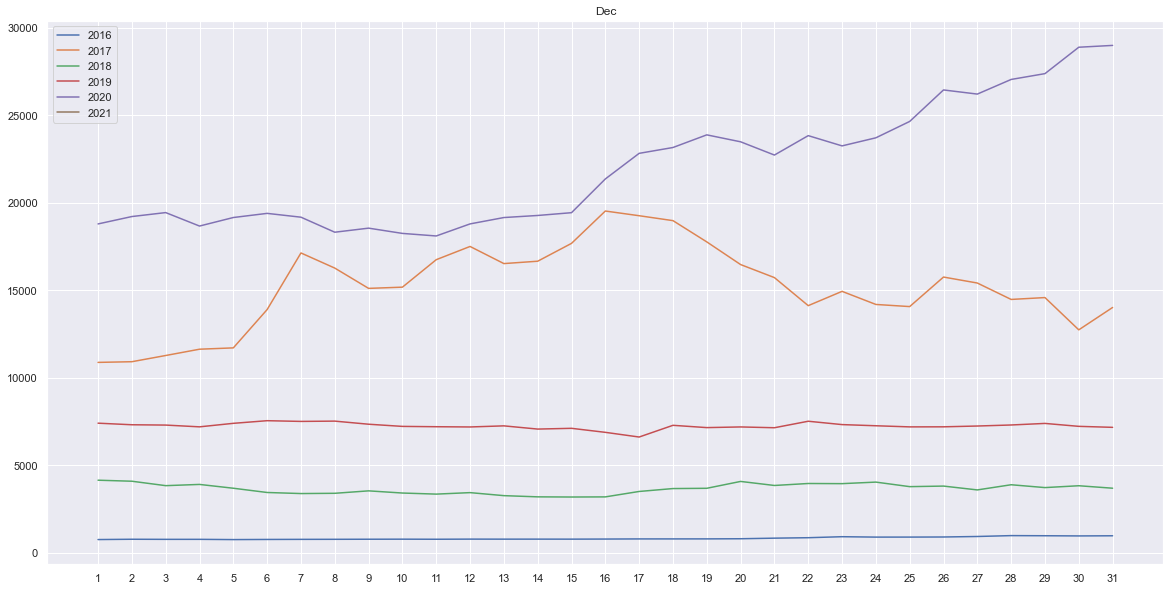

In [12]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = btcDf[(btcDf['hour'] == 23) & (btcDf['year'] == j) & (btcDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
        for k in x['day']:
            y = tweetDf[(tweetDf['month'] == i) & (tweetDf['year'] == j) & (tweetDf['crypto_related'] == True) & (tweetDf['day'] == k)]
            if y.empty == False:
                plt.scatter(k,x.iloc[k - 1]['rate_close'],c='red')
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

## Tweets corresponding to crypto mapped onto Doge historical month visualization

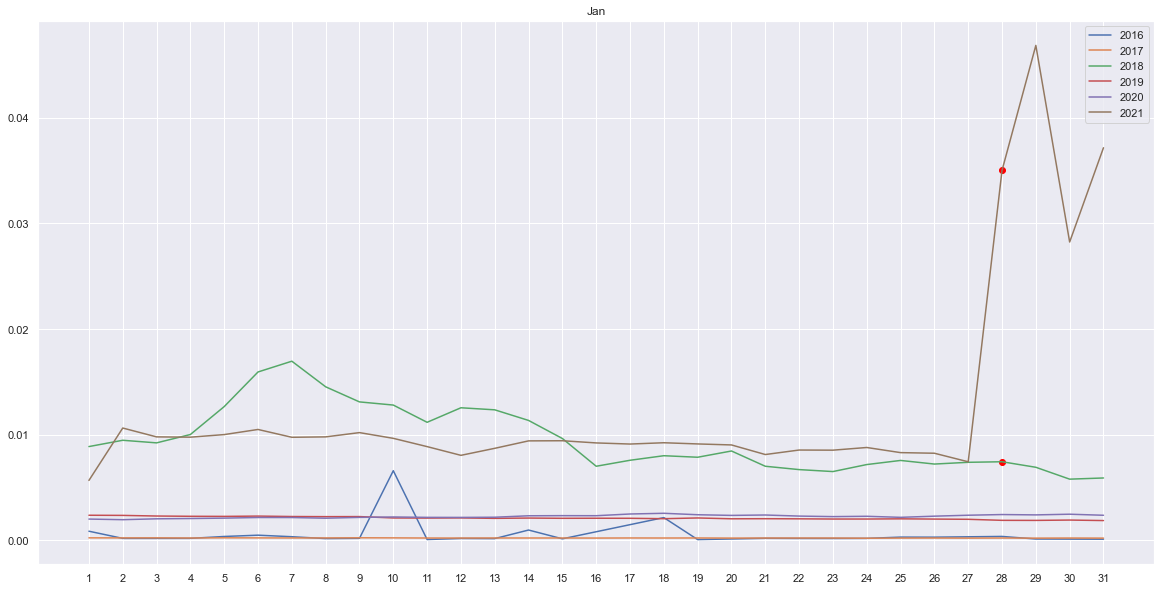

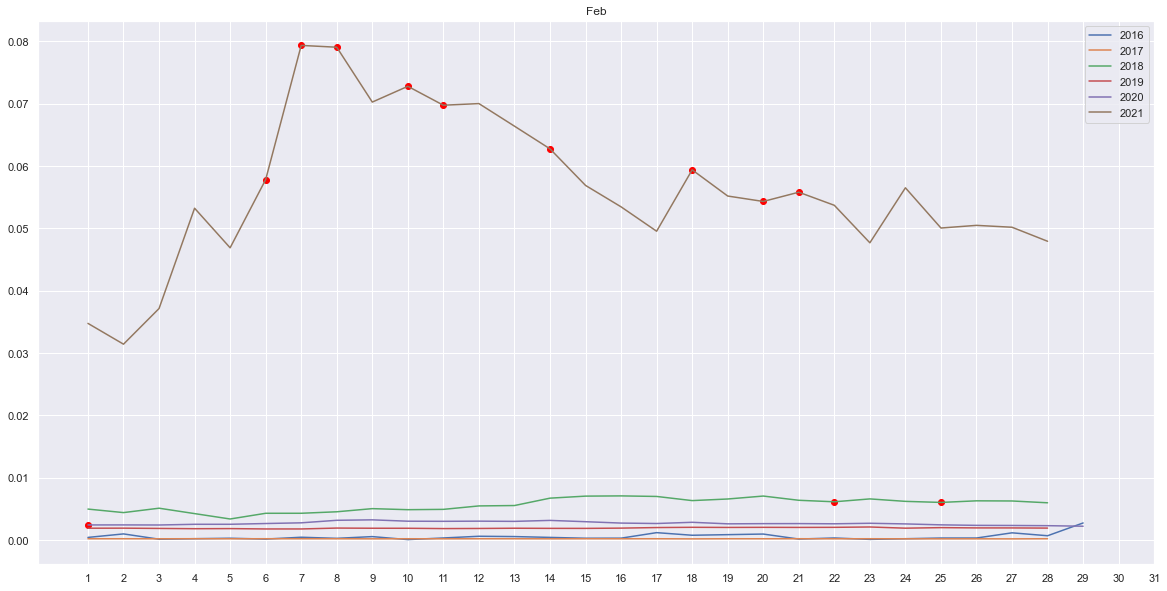

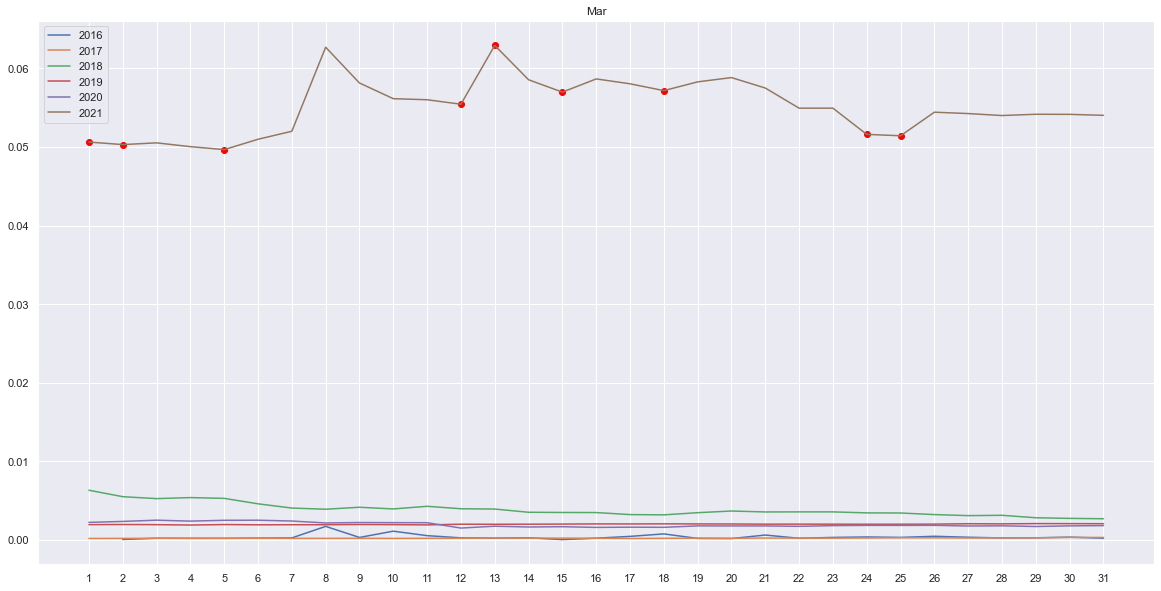

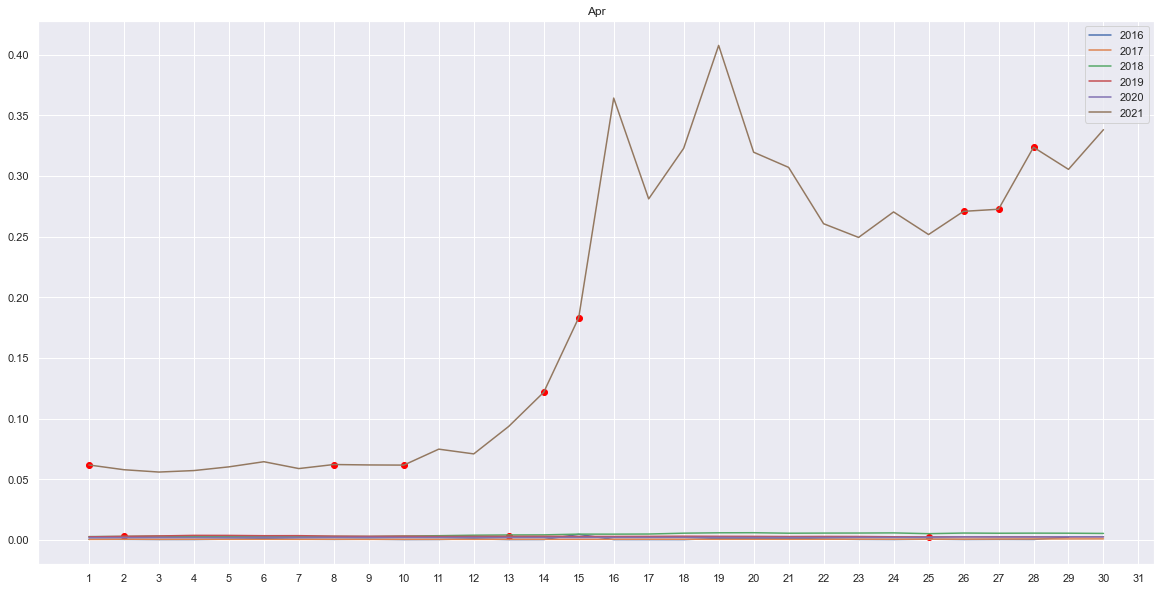

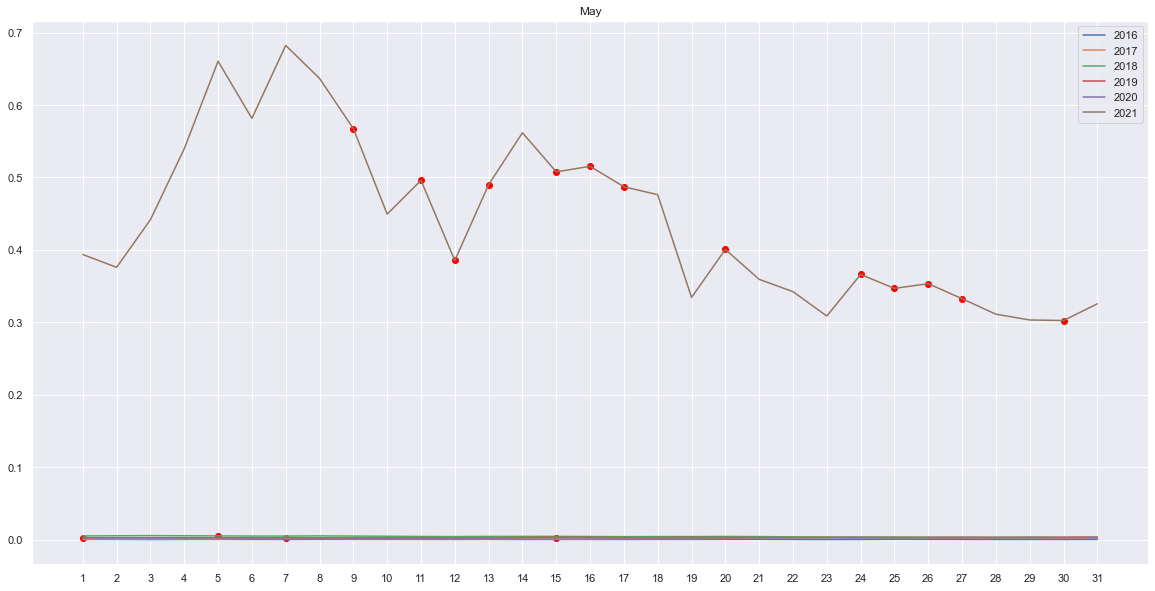

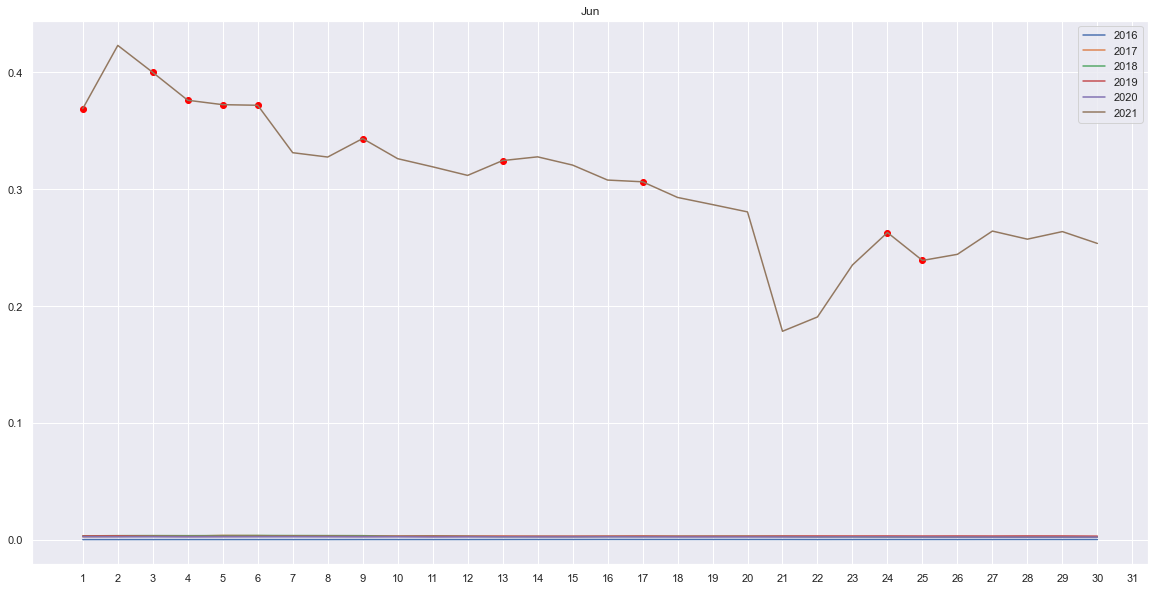

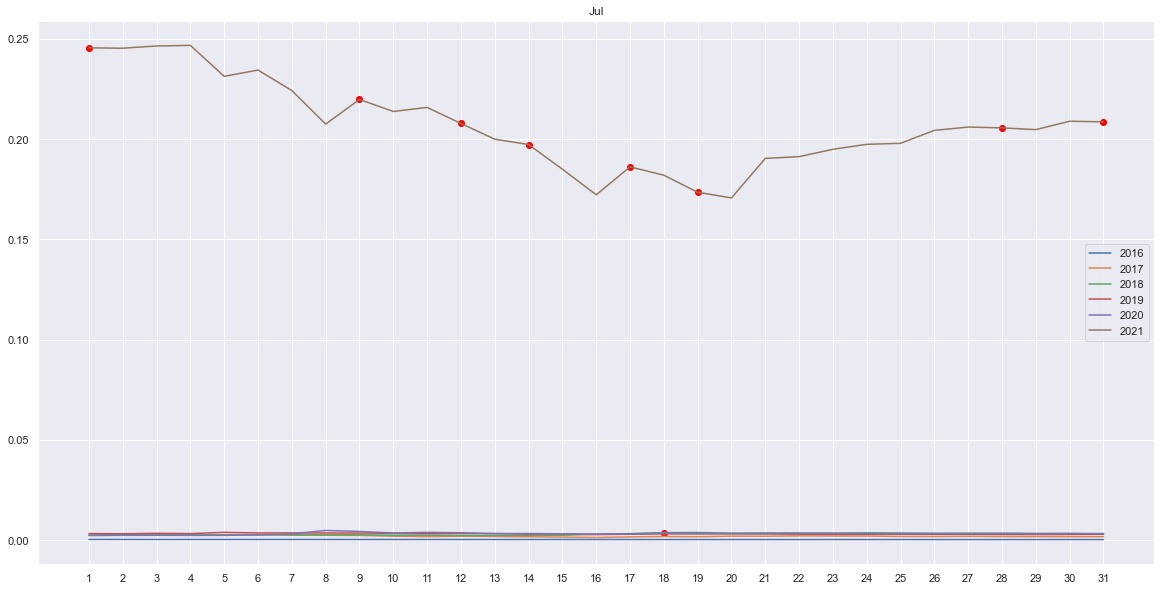

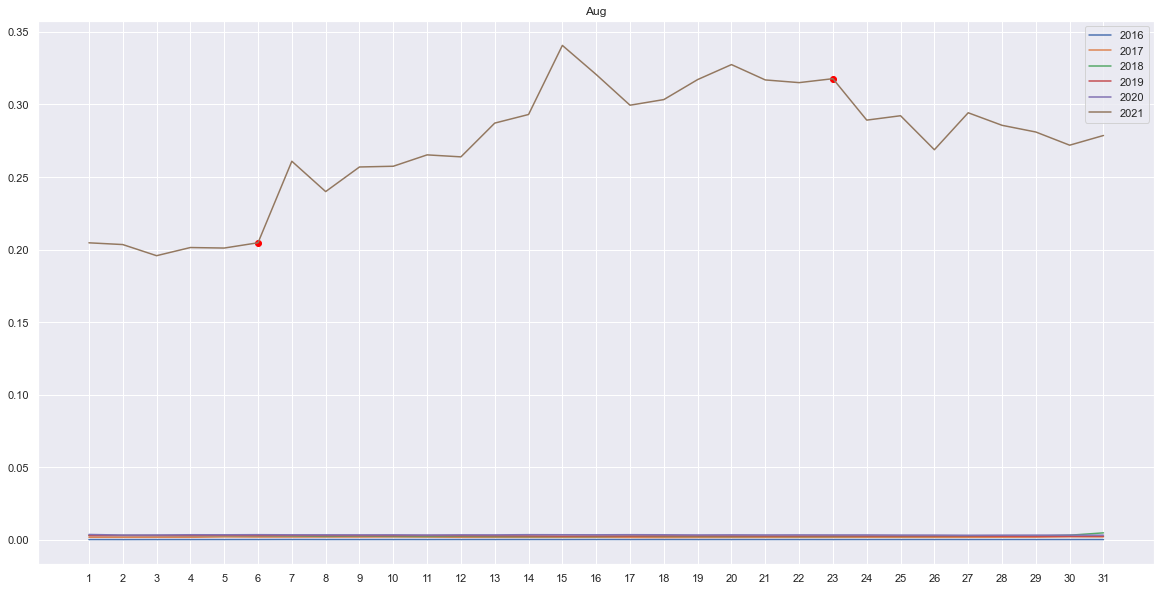

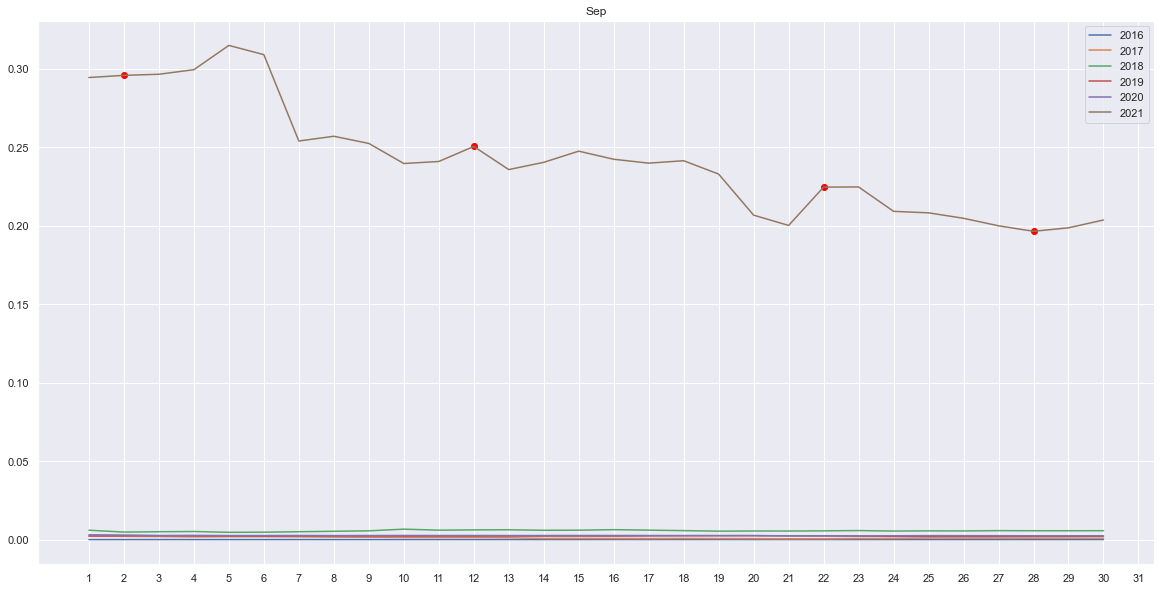

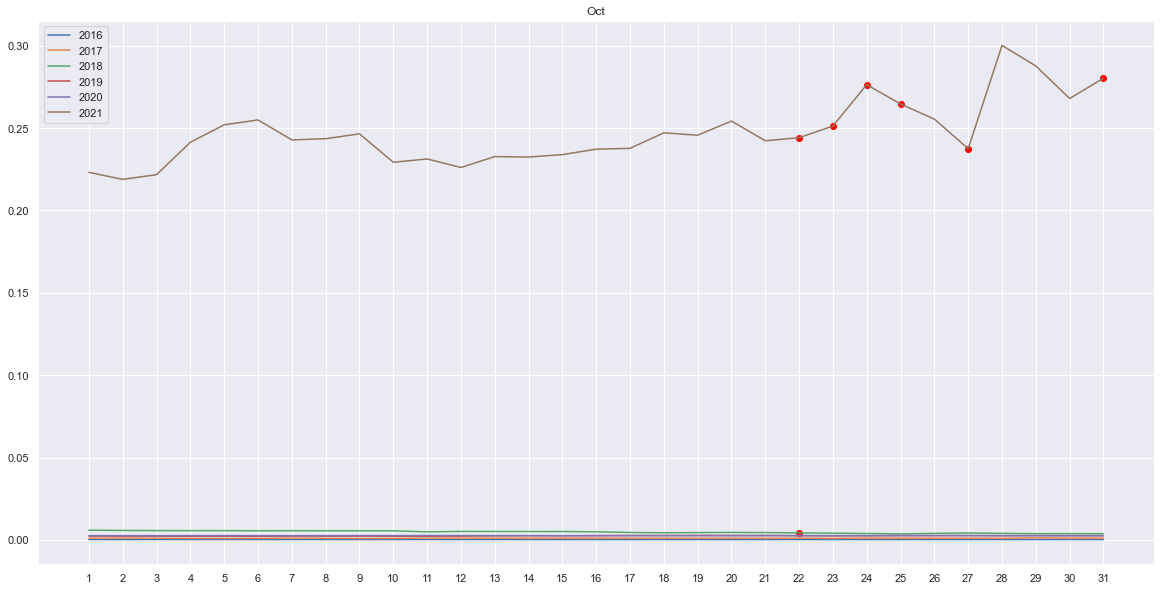

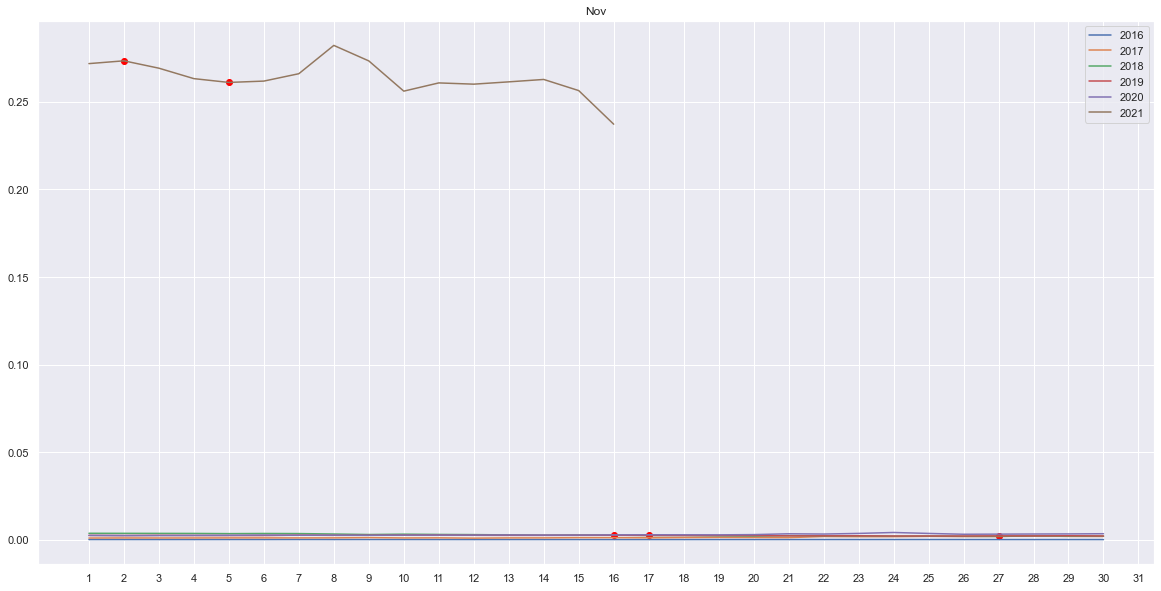

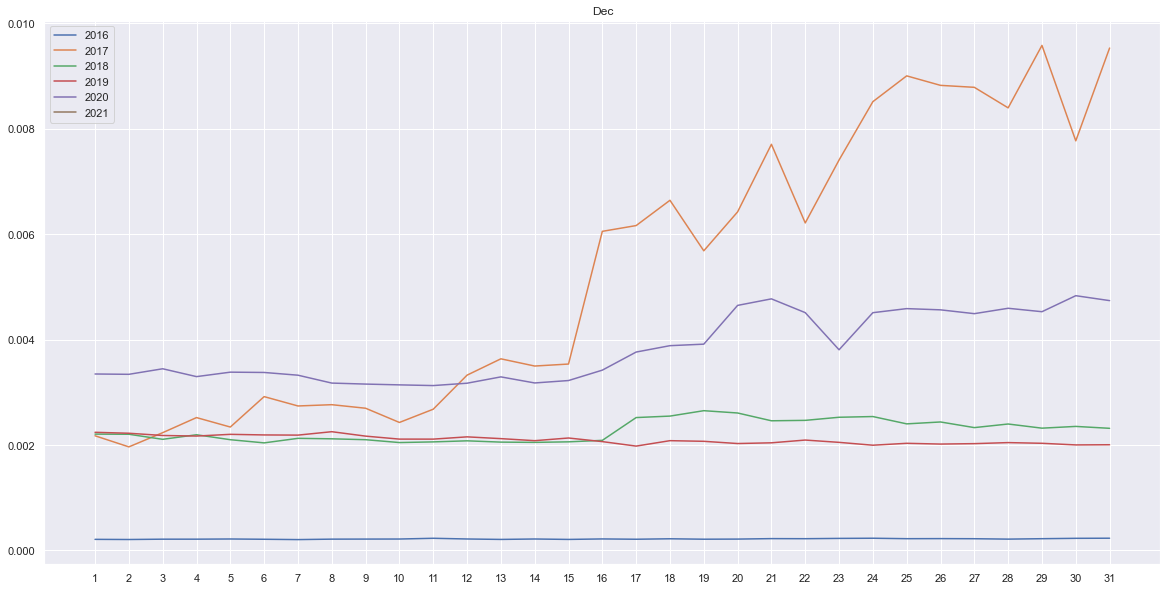

In [13]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = dogeDf[(dogeDf['hour'] == 23) & (dogeDf['year'] == j) & (dogeDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
        for k in x['day']:
            y = tweetDf[(tweetDf['month'] == i) & (tweetDf['year'] == j) & (tweetDf['crypto_related'] == True) & (tweetDf['day'] == k)]
            if y.empty == False:
                plt.scatter(k,x.iloc[k - 1]['rate_close'],c='red')
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

tweet on 2017-11-27:
@ThisIsSandeepG Not true. A friend sent me part of a BTC a few years, but I don’t know where it is.


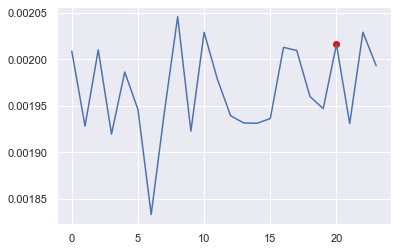

tweet on 2018-1-28:
But wait, there’s more: the flamethrower is sentient, its safe word is “cryptocurrency” and it comes with a free blockchain


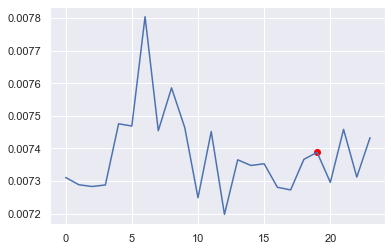

tweet on 2018-2-22:
@DeadlyBananas @MichaelAVaughn Not sure. I let @jack know, but it’s still going. I literally own zero cryptocurrency, apart from .25 BTC that a friend sent me many years ago.


tweet on 2018-2-25:
@cheresh @andrestaltz End-to-end encryption encoded at firmware level. Unlikely to be hacked w current computing tech. If it is (and we learn about it), a crypto fix will go out immediately via network-wide firmware update.


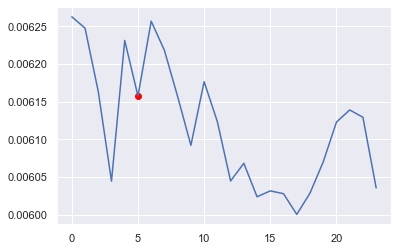

tweet on 2018-5-5:
Cryptocandy


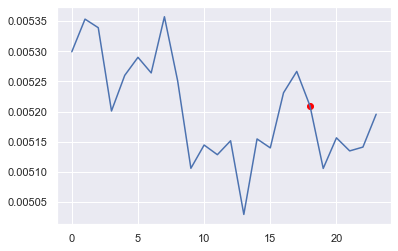

tweet on 2018-10-22:
@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉  https://t.co/9ZbBJ5fuVq


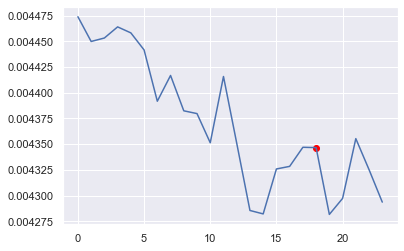

tweet on 2019-4-2:
@Tom_Heats Dogecoin might be my fav cryptocurrency. It’s pretty cool.
tweet on 2019-4-2:
@dogecoin Uh oh
tweet on 2019-4-2:
Dogecoin value may vary  https://t.co/UWerAhPv63
tweet on 2019-4-2:
Dogecoin rulz  https://t.co/flWWUgAgLU


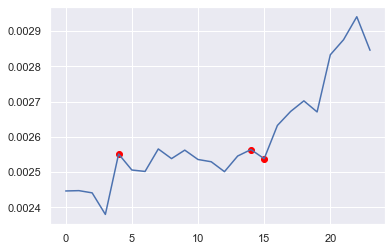

tweet on 2019-4-13:
@CryptoCobain Cryptocurrency is my safe word


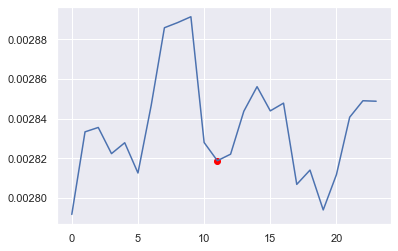

tweet on 2019-5-7:
@CryptoNekoZ @Tesla Click checkbox under “Advanced Settings”


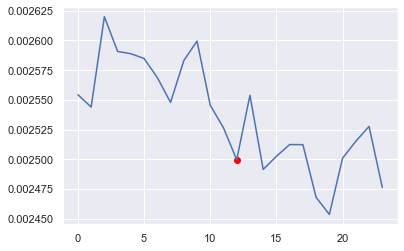

tweet on 2020-2-1:
@nichegamer The crypto scam level on Twitter is reaching new levels. This is not cool.


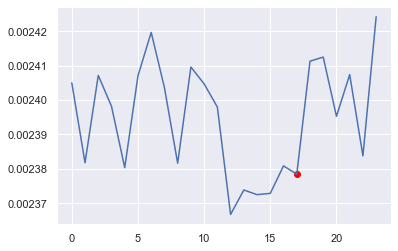

tweet on 2020-4-25:
@28delayslater @justpaulinelol Dogecoin Mode


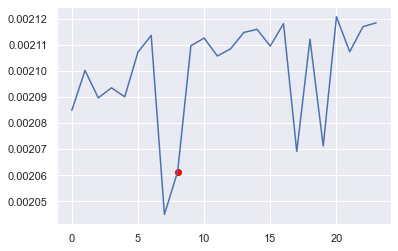

tweet on 2020-5-1:
@Bitcoin How much for some anime Bitcoin?  https://t.co/itqRslFNcb
tweet on 2020-5-1:
@Bitcoin 🤣🤣


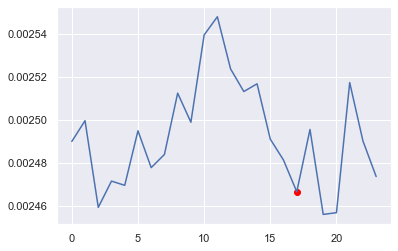

tweet on 2020-5-15:
@jk_rowling I still only own 0.25 Bitcoins btw
tweet on 2020-5-15:
@jk_rowling Pretty much, although massive currency issuance by govt central banks is making Bitcoin Internet 👻 money look solid by comparison


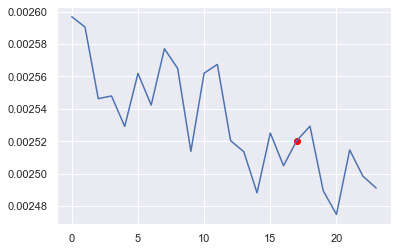

tweet on 2020-7-18:
@maxxrpbtc @TheCryptoLark @Manny6Manny @jungleincxrp @digitalassetbuy @MoonLamboio @JWilliamsFstmed Good article. I started The Boring Company as a joke, but now it’s digging real tunnels!


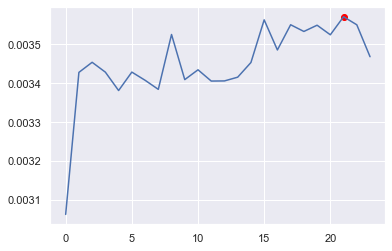

tweet on 2020-11-16:
@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶


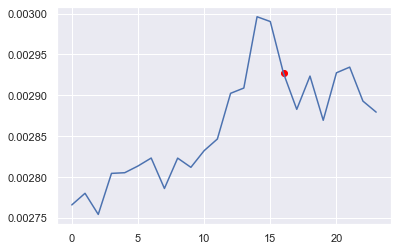

tweet on 2020-11-17:
@ReflexFunds @nickidk4 @pcgamer Dojo/Doge


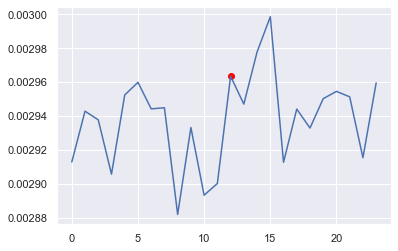

tweet on 2021-1-28:
@DocumentingBTC The dollar is shorting itself


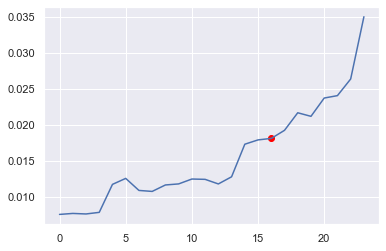

tweet on 2021-2-6:
@Grimezsz Dogecake
tweet on 2021-2-6:
@Jbuttermost @Dogecoinrich 🤣🤣
tweet on 2021-2-6:
@Dogecoinrich 🤣🤣


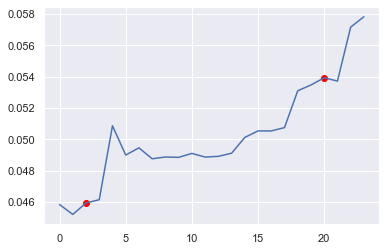

tweet on 2021-2-7:
@itsALLrisky It’s the most fun crypto!
tweet on 2021-2-7:
🎶 Who let the Doge out 🎶
tweet on 2021-2-7:
@itsALLrisky Doge appears to be inflationary, but is not meaningfully so (fixed # of coins per unit time), whereas BTC is arguably deflationary to a fault.  Transaction speed of Doge should ideally be a few orders of magnitude faster.


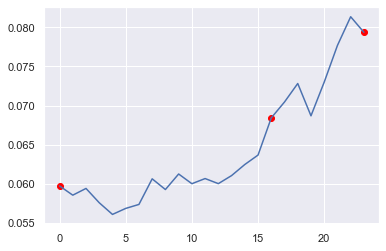

tweet on 2021-2-8:
@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer 🤣🤣


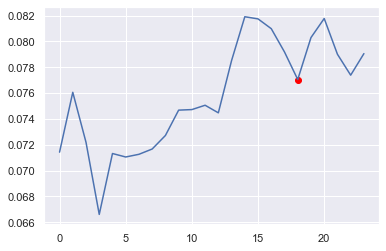

tweet on 2021-2-10:
@freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs
tweet on 2021-2-10:
Bought some Dogecoin for lil X, so he can be a toddler hodler


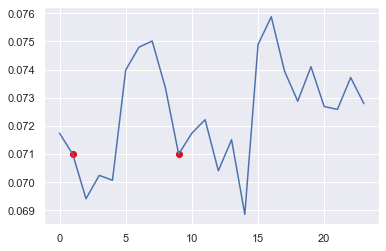

tweet on 2021-2-11:
Frodo was the underdoge, All thought he would fail, Himself most of all.  https://t.co/zGxJFDzzrM
tweet on 2021-2-11:
@gtera27 Doge is underestimated


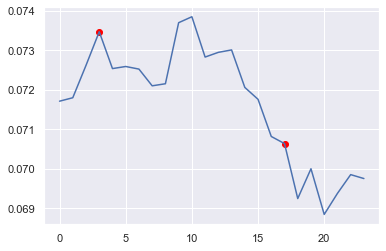

tweet on 2021-2-14:
@RationalEtienne An acceptable percentage. Doge is much more concentrated.
tweet on 2021-2-14:
If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.


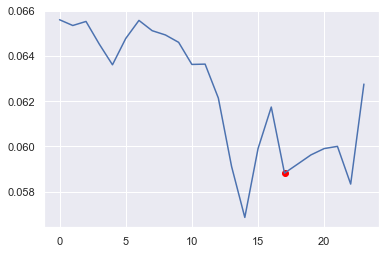

tweet on 2021-2-18:
@business To be clear, I am *not* an investor, I am an engineer. I don’t even own any publicly traded stock besides Tesla.   However, when fiat currency has negative real interest, only a fool wouldn’t look elsewhere.   Bitcoin is almost as bs as fiat money. The key word is “almost”.
tweet on 2021-2-18:
@business Tesla’s action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&amp;P500 company.
tweet on 2021-2-18:
@realfuckingnews @business Somehow, a hash text file using ancient crypto can be exchanged for real goods &amp; services!? Amazing.


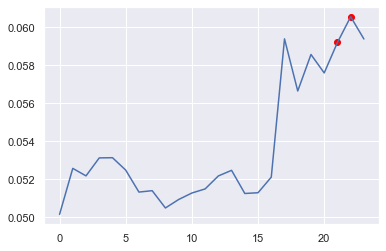

tweet on 2021-2-20:
@PeterSchiff An email saying you have gold is not the same as having gold. You might as well have crypto.  Money is just data that allows us to avoid the inconvenience of barter.  That data, like all data, is subject to latency &amp; error. The system will evolve to that which minimizes both.
tweet on 2021-2-20:
@PeterSchiff That said, BTC &amp; ETH do seem high lol
tweet on 2021-2-20:
@dogecoin I just set up some little Doge mining rigs with my kids. It was fun.
tweet on 2021-2-20:
@PPathole @dogecoin Just some used Antminer L3+ rigs bought off eBay. Not really economic, but it was a fun family project.
tweet on 2021-2-20:
Heard a rumor some crypto coin was pegging the dollar 🤣🤣
tweet on 2021-2-20:
Cryptocurrency explained  https://t.co/kUXaXx8a1R


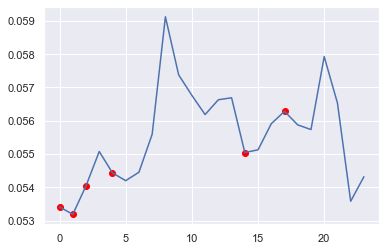

tweet on 2021-2-21:
Dojo 4 Doge


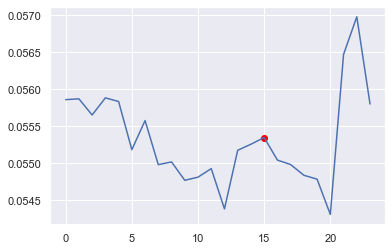

tweet on 2021-3-1:
Doge meme shield (legendary item)  https://t.co/CeomU9q84c


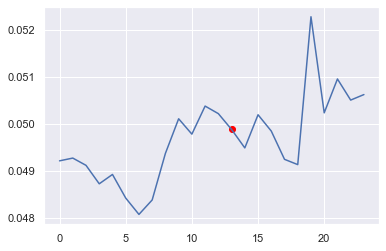

tweet on 2021-3-2:
@draecomino 2022: Dogecoin is dumb
tweet on 2021-3-2:
Scammers &amp; crypto should get a room
tweet on 2021-3-2:
@WootiezTV Very much so &amp; its leader shall be The Doge   https://t.co/VXmuW5c0y9


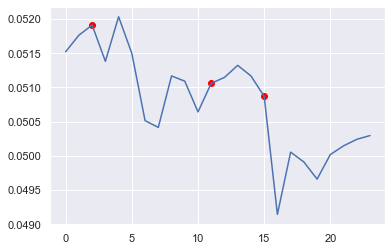

tweet on 2021-3-5:
Doge spelled backwards is Egod


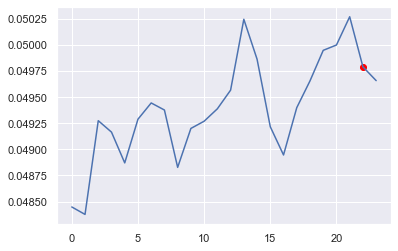

tweet on 2021-3-12:
BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!


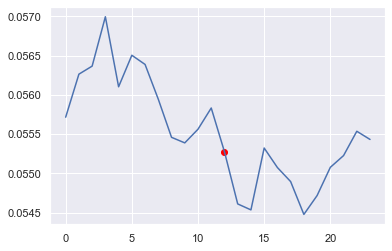

tweet on 2021-3-13:
Why are you so dogematic, they ask
tweet on 2021-3-13:
Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.
tweet on 2021-3-13:
Doge day afternoon


tweet on 2021-3-15:
@beeple 420M Doge


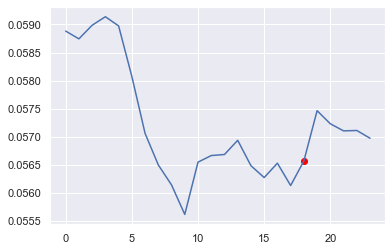

tweet on 2021-3-18:
@lexfridman Sometimes it’s about Doge


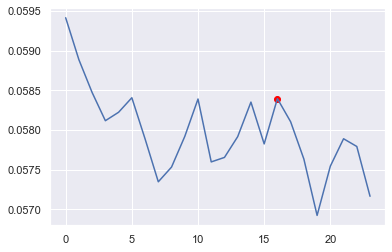

tweet on 2021-3-24:
Pay by Bitcoin capability available outside US later this year
tweet on 2021-3-24:
Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly.  Bitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.
tweet on 2021-3-24:
You can now buy a Tesla with Bitcoin


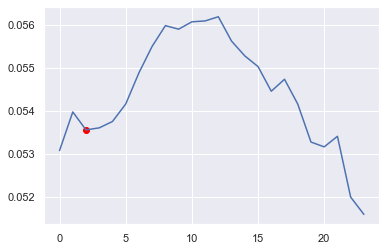

tweet on 2021-3-25:
@dogecoinww @MattWallace888 @CorinnaKopf You raise a good point haha


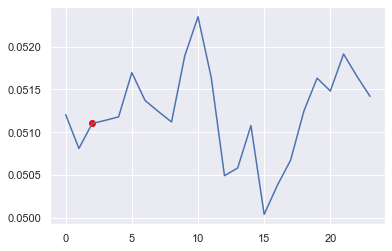

tweet on 2021-4-1:
SpaceX is going to put a literal Dogecoin on the literal moon


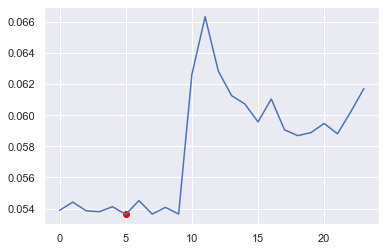

tweet on 2021-4-8:
@dogeofficialceo @WatchersTank @SpaceX Looking at pups soon!


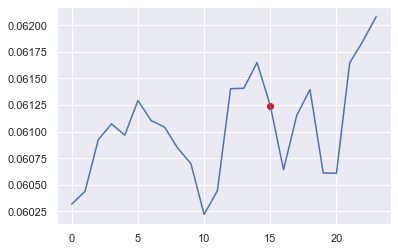

tweet on 2021-4-10:
@memescryptor !


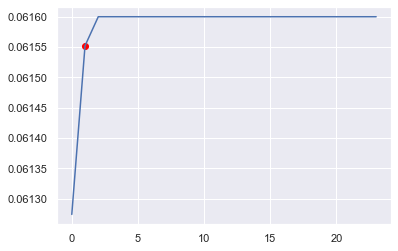

tweet on 2021-4-14:
@AstroJordy @dogeofficialceo @F9Block5 Insanely cute!
tweet on 2021-4-14:
@dogeofficialceo @F9Block5 🤣🤣
tweet on 2021-4-14:
Doge Barking at the Moon  https://t.co/QFB81D7zOL
tweet on 2021-4-14:
@WSBChairman Doge Barking at the Moon – Miro  https://t.co/1vTM2XOusy


tweet on 2021-4-15:
@sadiaslayy @DogecoinBets 😮


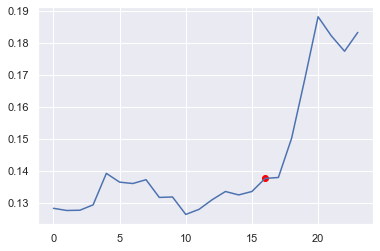

tweet on 2021-4-26:
@stoolpresidente No, you do not. I have not sold any of my Bitcoin. Tesla sold 10% of its holdings essentially to prove liquidity of Bitcoin as an alternative to holding cash on balance sheet.


tweet on 2021-4-27:
@DocumentingBTC Yes


tweet on 2021-4-28:
The Dogefather SNL May 8


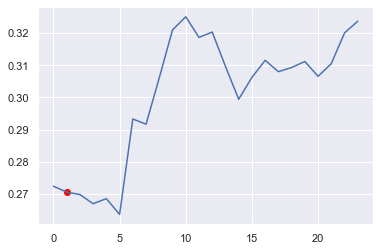

tweet on 2021-5-9:
SpaceX launching satellite Doge-1 to the moon next year  – Mission paid for in Doge – 1st crypto in space – 1st meme in space  To the mooooonnn!!   https://t.co/xXfjGZVeUW


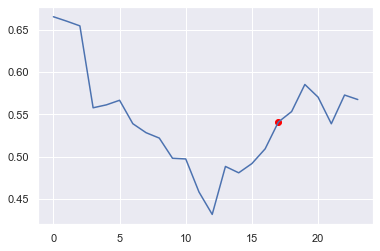

tweet on 2021-5-11:
Do you want Tesla to accept Doge?


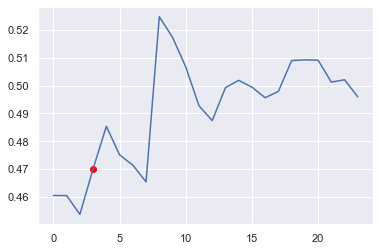

tweet on 2021-5-12:
Tesla &amp; Bitcoin  https://t.co/YSswJmVZhP


tweet on 2021-5-13:
To be clear, I strongly believe in crypto, but it can’t drive a massive increase in fossil fuel use, especially coal
tweet on 2021-5-13:
Working with Doge devs to improve system transaction efficiency. Potentially promising.


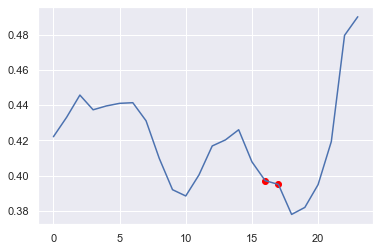

tweet on 2021-5-15:
@itsALLrisky Ideally, Doge speeds up block time 10X, increases block size 10X &amp; drops fee 100X. Then it wins hands down.
tweet on 2021-5-15:
@long_elon @itsALLrisky Only if Doge can’t do it. Big pain in the neck to create another one.


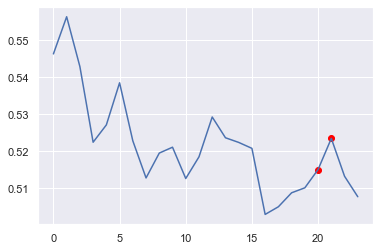

tweet on 2021-5-16:
@PeterMcCormack Obnoxious threads like this make me want to go all in on Doge
tweet on 2021-5-16:
@CryptoWhale Indeed
tweet on 2021-5-16:
@ChainLinkGod @PeterMcCormack Hey cryptocurrency “experts”, ever heard of PayPal? It’s possible … maybe … that I know than you realize about how money works.
tweet on 2021-5-16:
@ChainLinkGod @PeterMcCormack Bitcoin is actually highly centralized, with supermajority controlled by handful of big mining (aka hashing) companies.   A single coal mine in Xinjiang flooded, almost killing miners, and Bitcoin hash rate dropped 35%. Sound “decentralized” to you?   https://t.co/Oom8yzGRNQ
tweet on 2021-5-16:
@poisonouspinups @michael_saylor He should wear outfit for Halloween, but with “Bitcoin” tattooed high on thighs
tweet on 2021-5-16:
@EmperorBTC @CryptoWhale  https://t.co/4OC3CEKozo


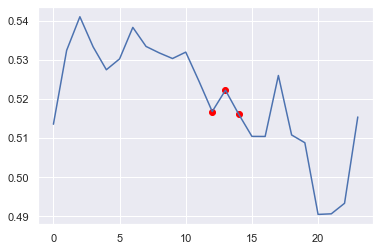

tweet on 2021-5-17:
@BTC_Archive To clarify speculation, Tesla has not sold any Bitcoin


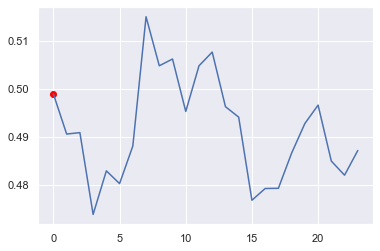

tweet on 2021-5-20:
How much is that Doge in the window?  https://t.co/bxTkWOr50V
tweet on 2021-5-20:
@thatdogegirl @WhatsupFranks @TeslaGong Worth reading
tweet on 2021-5-20:
@WhatsupFranks @TeslaGong Currency is already digital! Decentralized crypto is an attempt to wrest power of currency dilution (pernicious form of taxation) &amp; capital controls from governments. That said, I sure hope the cure is better than the disease!  Mars/AI are essential to passing the great filter/s.
tweet on 2021-5-20:
@xSharknado @DogecoinRise @TeslaGong 🤣🤣
tweet on 2021-5-20:
@DogecoinRise @TeslaGong Es wurde mir in deutschland gegeben
tweet on 2021-5-20:
@heydave7 Yeah, I haven’t &amp; won’t sell any Doge
tweet on 2021-5-20:
@heydave7 A longtime Tesla supporter gave me the Doge dollar sticker at Giga Berlin
tweet on 2021-5-20:
@TeslaGong @wintonARK Bitcoin hashing (aka mining) energy usage is starting to exceed that of medium-sized countries. Almost impossible for small hashers to succeed without tho

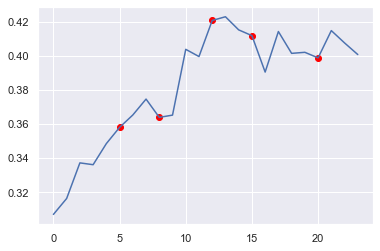

tweet on 2021-5-24:
If you’d like to help develop Doge, please submit ideas on GitHub &amp;  https://t.co/liAPQMFaQB @dogecoin_devs
tweet on 2021-5-24:
Spoke with North American Bitcoin miners. They committed to publish current &amp; planned renewable usage &amp; to ask miners WW to do so. Potentially promising.
tweet on 2021-5-24:
Someone suggested changing Dogecoin fees based on phases of the moon, which is pretty awesome haha


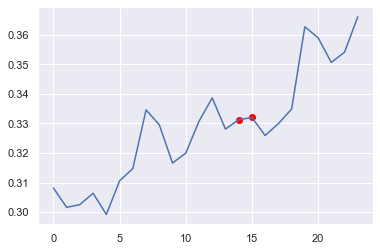

tweet on 2021-5-25:
@heydave7 @dogecoin_devs Doge has dogs &amp; memes, whereas the others do not
tweet on 2021-5-25:
@itsALLrisky Please note Dogecoin has no formal organization &amp; no one reports to me, so my ability to take action is limited


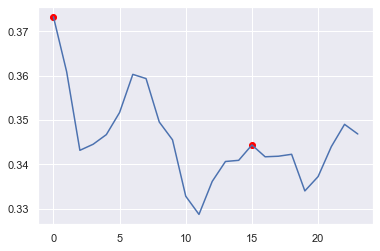

tweet on 2021-5-26:
@BTC_Archive 🤣🤣


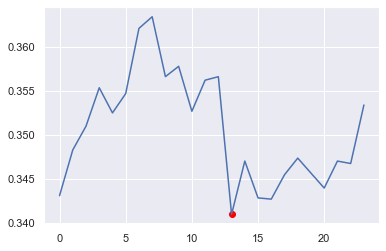

tweet on 2021-5-27:
@TDogewhisperer @spair @itsALLrisky @mcuban 🤣🤣


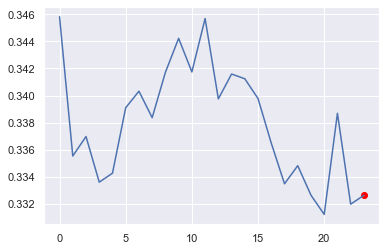

tweet on 2021-5-30:
@hiddin2urleft @greg16676935420 @blockfolio @BillyM2k @itsALLrisky @GloryDoge @DogecoinRise @ItsDogeCoin @DogeEducation @Investments_CEO 🤣🤣


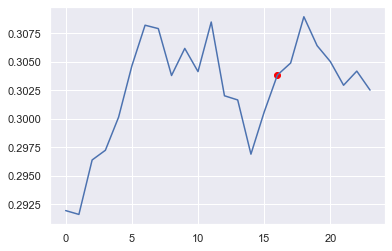

tweet on 2021-6-1:
@DocumentingBTC Nice
tweet on 2021-6-1:
@dogeofficialceo @SouthPark When I visit Japan later this year


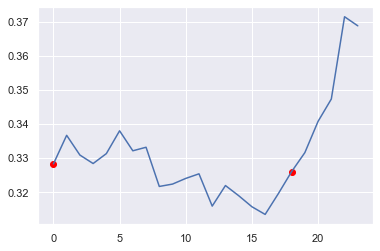

tweet on 2021-6-3:
@JRNYcrypto Needs laser eyes too
tweet on 2021-6-3:
@JRNYcrypto 🤣🤣
tweet on 2021-6-3:
#Bitcoin 💔  https://t.co/lNnEfMdtJf
tweet on 2021-6-3:
@CryptoWhale Great thread 🤣


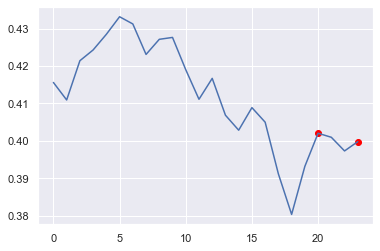

tweet on 2021-6-4:
@ItsDogeCoin @RTHowell Haf yu sin mi danz?


tweet on 2021-6-5:
@CryptoWhale 👆
tweet on 2021-6-5:
@lexfridman @VitalikButerin @ethereum @Bitcoin @dogecoin @ShibainuCoin @IOHK_Charles @Cardano @chainlink @0xPolygon I pretty much agree with Vitalik


tweet on 2021-6-6:
@BTCTN A new space race has begun!


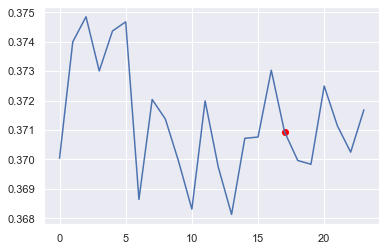

tweet on 2021-6-9:
@dogeofficialceo @MattWallace888 Now that I have made some improvements, I’m pretty sure it’s worth $69k haha


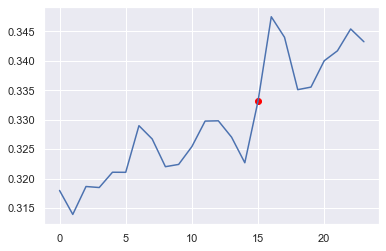

tweet on 2021-6-13:
@Cointelegraph This is inaccurate. Tesla only sold ~10% of holdings to confirm BTC could be liquidated easily without moving market.  When there’s confirmation of reasonable (~50%) clean energy usage by miners with positive future trend, Tesla will resume allowing Bitcoin transactions.


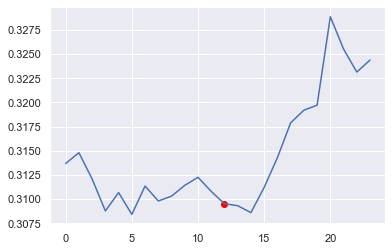

tweet on 2021-6-17:
@BitcoinMagazine @jespow Based on what data?


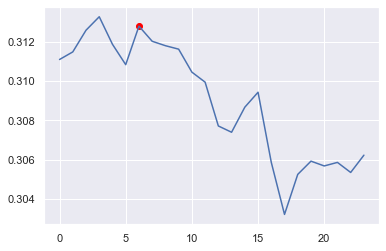

tweet on 2021-6-24:
“That’s not funny!” – Bitcoin maxis
tweet on 2021-6-24:
How many Bitcoin maxis does it take to screw in a lightbulb?
tweet on 2021-6-24:
@jack Oh right … Bitcoin haha
tweet on 2021-6-24:
@hiddin2urleft @ItsDogeCoin @Investments_CEO @MemeInvestors @Dogecoinxx @greg16676935420 @blockfolio @dogeofficialceo @DogeEducation @DogecoinTweet #gravitas


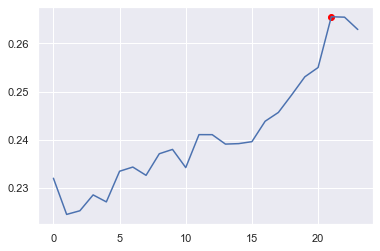

tweet on 2021-6-25:
@DogecoinRise Starship Super Heavy


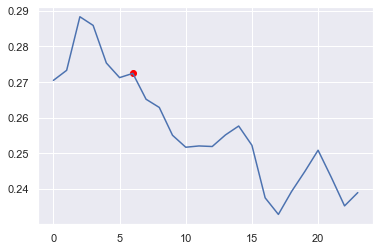

tweet on 2021-7-1:
@RenataKonkoly @thesheetztweetz @rookisaacman @johnkrausphotos @wapodavenport @blueorigin But can I pay in Doge?


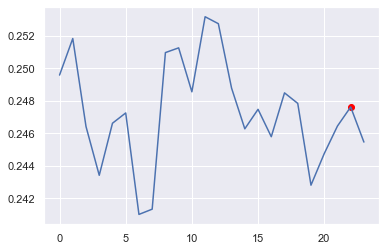

tweet on 2021-7-9:
@MattWallace888 BTC &amp; ETH are pursuing a multilayer transaction system, but base layer transaction rate is slow &amp; transaction cost is high.  There is merit imo to Doge maximizing base layer transaction rate &amp; minimizing transaction cost with exchanges acting as the de facto secondary layer.


tweet on 2021-7-12:
@dogeofficialceo 🤣
tweet on 2021-7-12:
@CGDaveMac Maybe if it sees a Shiba Inu, the car renders a Dogecoin …


tweet on 2021-7-14:
@doge_southern @SamTwits @TeslaOwnersEBay @Kristennetten @RationalEtienne @EvaFoxU @JohnnaCrider1 @TeslaChillMode @CodingMark @Model3Owners @WholeMarsBlog @AustinTeslaClub Next baby will be a girl
tweet on 2021-7-14:
@doge_southern @SamTwits @TeslaOwnersEBay @Kristennetten @RationalEtienne @EvaFoxU @JohnnaCrider1 @TeslaChillMode @CodingMark @Model3Owners @WholeMarsBlog @AustinTeslaClub Me too!


tweet on 2021-7-17:
@AshleyIllusion1 @lexfridman Lil X is hodling his Doge like a champ. Literally never said the word “sell” even once!


tweet on 2021-7-19:
@jack @BitcoinMagazine @CathieDWood Sure, I have a ton
tweet on 2021-7-19:
@BitcoinMagazine @jack @CathieDWood During this talk, we will sing a cover of The Final Countdown by Europe  https://t.co/7YUXiW8dhd


tweet on 2021-7-28:
@heydave7 We don’t have that many Bitcoin, but it’s close


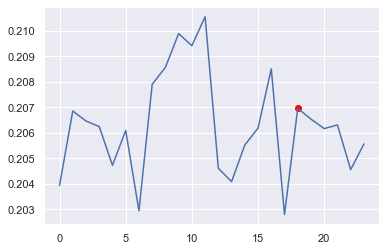

tweet on 2021-7-31:
@doge_southern @truth_tesla @ConsumerReports They do


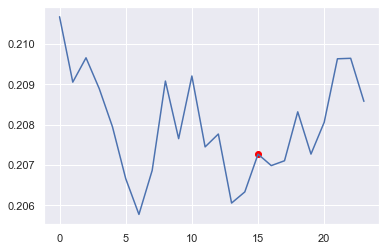

tweet on 2021-8-6:
@brian_armstrong @MarkWarner Agreed, this is not the time to pick technology winners or losers in cryptocurrency technology. There is no crisis that compels hasty legislation.


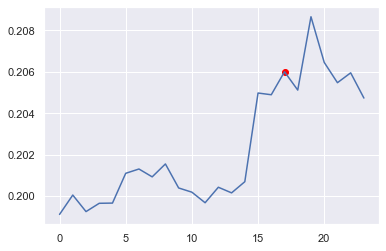

tweet on 2021-8-23:
@OptimoPrincipi Ancient Doges


tweet on 2021-9-2:
@dogecoin_devs Good progress. Applying information theory to currency (which is just information), lower fees reduce noise &amp; faster &amp; more consistent sync time improve latency &amp; jitter.


tweet on 2021-9-12:
@dogeofficialceo @WholeMarsBlog @POTUS 🤣
tweet on 2021-9-12:
@SirWoofOfDoge @WholeMarsBlog 🤣🤣
tweet on 2021-9-12:
@Dogeshade Deep


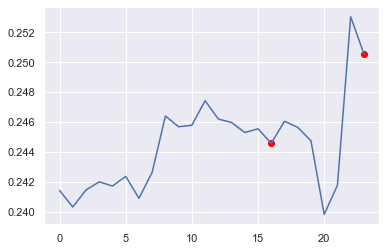

tweet on 2021-9-22:
@BillyM2k Super important for Doge fees to drop to make things like buying movie tix viable


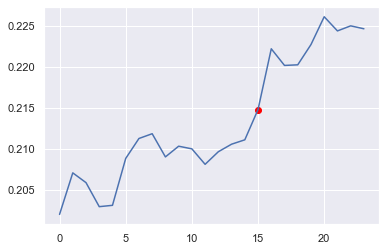

tweet on 2021-9-28:
@NewFolderF @dogeofficialceo @BillyM2k 🤣


tweet on 2021-10-22:
@UberFacts *In Dogecoin


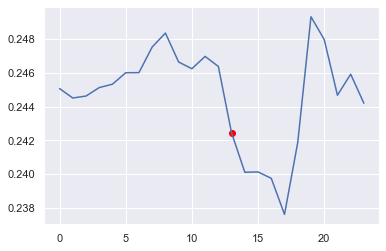

tweet on 2021-10-23:
@mishaboar @DogecoinFdn Neither Jared, nor me, nor anyone I know has anything to do with this foundation


tweet on 2021-10-24:
@BillyM2k Plus crypto scams haha
tweet on 2021-10-24:
@BillyM2k @TeslaGong @mishaboar @DogecoinFdn 💯
tweet on 2021-10-24:
@itsALLrisky @TeslaGong @mishaboar @DogecoinFdn Possibly. Bitcoin was conceived at a time of relatively low bandwidth &amp; high latency. If both continue to improve substantially, we will reach a point when no second layer is needed.
tweet on 2021-10-24:
@TeslaGong @mishaboar @DogecoinFdn Not recently. What matters imo is lowering fees, decreasing block time &amp; increasing block size. A single layer network with exchanges as de facto layer 2 seems like the simplest solution for a medium of exchange.
tweet on 2021-10-24:
@ProTheDoge Lots of people I talked to on the production lines at Tesla or building rockets at SpaceX own Doge. They aren’t financial experts or Silicon Valley technologists. That’s why I decided to support Doge – it felt like the people’s crypto.
tweet on 2021-10-24:
@Filasophical @ShibaInuHodler Out of curiosity, I acquired 

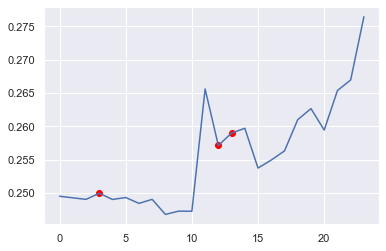

tweet on 2021-10-25:
@CryptoWhale Sclerotic democracy


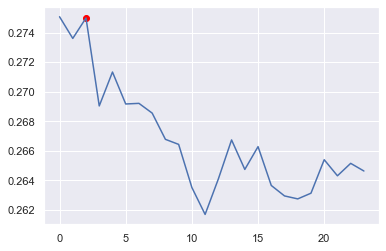

tweet on 2021-10-27:
@BillyM2k If I send you 2 Doge, will you promise to send me 1 Doge?
tweet on 2021-10-27:
@dogeofficialceo @wapodavenport 🤣


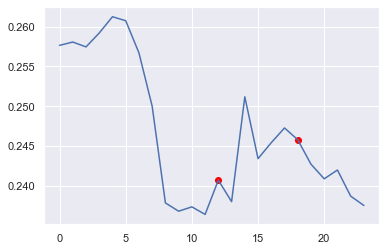

tweet on 2021-10-31:
Tuition is in Dogecoin &amp; u get a discount if u have a dog


tweet on 2021-11-2:
@BillyM2k How about my lil doge Floki? He would make a great CEO! His judgment is 🤌.


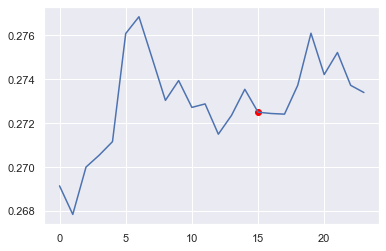

tweet on 2021-11-5:
@dogeofficialceo @BillyM2k 🤣


In [34]:
validTweets = tweetDf[(tweetDf['crypto_related'] == True)]
for i in range(2016,2022):
    for j in range(1,13):
        for k in range(1,32):
                x = dogeDf[(dogeDf['year'] == i) & (dogeDf['month'] == j) & (dogeDf['day'] == k)]
                y = validTweets[(validTweets['year'] == i) & (validTweets['month'] == j) & (validTweets['day'] == k)]
                if (y.empty == False) & (x.empty == False):
                    plt.plot(x['hour'],x['rate_close'])
                    for p in range(0,24):
                        z = y[(y['hour'] == p)]
                        if(z.empty == False):
                            plt.scatter(x.iloc[p]['hour'],x.iloc[p]['rate_close'],c='red')
                            t = np.array(z["tweet"])
                            for q in t:
                                print("tweet on " + str(i) +"-" +str(j)+ "-" +str(k)+":")
                                print(q)
                plt.show()
                
                
              

# 